In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress

In [2]:
# Specify the path to your CSV file
file_path = r'C:\Users\manda\Documents\Master thesis Data\Data file (1877-1922 transcribed data) (1).csv'


# Try different encodings until you find the right one
encodings = ['utf-8', 'latin1', 'utf-16']

for encoding in encodings:
    try:
        # Read the CSV file into a pandas DataFrame
        df = pd.read_csv(file_path, encoding=encoding)
        # Display the DataFrame
        print(df)
        break
    except UnicodeDecodeError:
        print(f"Failed to decode using encoding: {encoding}")

# Display the DataFrame
print(df)

Failed to decode using encoding: utf-8
             Date  Day  Month  Year  Attached.Thermometer..C.  \
0      1877-01-01    1      1  1877                     -99.9   
1      1877-01-02    2      1  1877                     -99.9   
2      1877-01-03    3      1  1877                     -99.9   
3      1877-01-04    4      1  1877                     -99.9   
4      1877-01-05    5      1  1877                     -99.9   
...           ...  ...    ...   ...                       ...   
16611  26/06/1922   26      6  1922                      11.7   
16612  27/06/1922   27      6  1922                      11.7   
16613  28/06/1922   28      6  1922                      10.0   
16614  29/06/1922   29      6  1922                       7.2   
16615  30/06/1922   30      6  1922                       7.2   

       Sea.Level.Pressure..hPa.  Dry.Bulb.Temp..C.  Wet.Bulb.Temp..C.  \
0                        -99.90              -99.9              -99.9   
1                        -99.90   

In [3]:
import pandas as pd

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out rows with missing rainfall data (-99.9)
missing_rainfall = df[df['Rainfall..mm.'] == -99.9]

# Find consecutive sequences of missing values
missing_rainfall['Date_diff'] = missing_rainfall['Date'].diff().dt.days
consecutive_missing = missing_rainfall.groupby((missing_rainfall['Date_diff'] != 1).cumsum())['Date'].agg(['first', 'last'])

# Calculate number of days for consecutive missing values
consecutive_missing['Number of Days'] = (consecutive_missing['last'] - consecutive_missing['first']).dt.days + 1

# Separate consecutive sequences from single-day missing values
consecutive_missing = consecutive_missing.reset_index(drop=True)
single_day_missing = missing_rainfall[~missing_rainfall['Date'].isin(consecutive_missing['first'])]

# Print consecutive sequences of missing values with number of days
print("Consecutive Missing Values:")
print(consecutive_missing[['first', 'last', 'Number of Days']])




C:\Users\manda\AppData\Local\Temp\ipykernel_3616\2491860989.py:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Consecutive Missing Values:
        first       last  Number of Days
0  1877-01-01 1877-06-30             181
1  1877-07-04 1877-07-17              14
2  1877-07-20 1877-07-21               2
3  1877-07-24 1877-07-24               1
4  1877-07-26 1877-07-26               1
5  1877-07-28 1877-07-28               1
6  1877-10-20 1877-10-20               1
7  1878-03-25 1878-03-25               1
8  1884-11-28 1884-11-28               1
9  1885-09-18 1885-09-19               2
10 1886-09-29 1886-09-29               1
11 1887-09-02 1887-09-02               1
12 1887-11-15 1887-11-15               1
13 1888-07-31 1888-07-31               1
14 1888-08-06 1888-08-06               1
15 1890-12-12 1890-12-12               1
16 1891-09-20 1891-09-20               1
17 1892-09-02 1892-09-02               1
18 1894-02-08 1894-02-08               1
19 1895-03-01 1895-03-01               1
20 1895-07-29 1895-07-29               1
21 1896-05-02 1896-05-02               1
22 1896-05-09 1896-05-09     

C:\Users\manda\AppData\Local\Temp\ipykernel_3616\2491860989.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_rainfall['Date_diff'] = missing_rainfall['Date'].diff().dt.days


In [4]:
# Filter out rows with -99.99 rainfall values
df_filtered = df[df['Rainfall..mm.'] != -99.9]

# Group by year and month, and calculate total rainfall for each month
monthly_total_rainfall = df_filtered.groupby(['Year', 'Month'])['Rainfall..mm.'].sum().reset_index()

# Display the total rainfall values for each month
print("Total rainfall values for each month for all years:")
print(monthly_total_rainfall)




Total rainfall values for each month for all years:
     Year  Month  Rainfall..mm.
0    1877      7            0.6
1    1877      8           45.7
2    1877      9           57.1
3    1877     10           43.4
4    1877     11           50.4
..    ...    ...            ...
535  1922      2          116.5
536  1922      3           17.2
537  1922      4           32.3
538  1922      5           15.0
539  1922      6           42.9

[540 rows x 3 columns]


In [5]:
# Filter out rows with missing rainfall data (-99.9)
missing_rainfall = df[df['Rainfall..mm.'] == -99.9]

# Group by year and month, and count the number of days with -99.9 rainfall values for each month
monthly_missing_values = missing_rainfall.groupby(['Year', 'Month']).size().reset_index(name='MissingDays')

# Filter out months with missing values ranging from 0 to 5 days (inclusive) and months with no missing values
filtered_months = monthly_missing_values[(monthly_missing_values['MissingDays']<=5)] 

# Merge with the original DataFrame to get the total rainfall values for the remaining months
merged_df = pd.merge(df, filtered_months, on=['Year', 'Month'], how='inner')

# Filter out rows with missing rainfall data (-99.9) for the remaining months
filtered_df = merged_df[merged_df['Rainfall..mm.'] != -99.9]

# Calculate the total rainfall values for all months
monthly_total_rainfall = filtered_df.groupby(['Year', 'Month']).agg({'Rainfall..mm.': 'sum'}).reset_index()

# Display the total rainfall values for each month
print("Total rainfall values for each month with less than or equal to 5 missing days:")
print(monthly_total_rainfall)


Total rainfall values for each month with less than or equal to 5 missing days:
    Year  Month  Rainfall..mm.
0   1877     10           43.4
1   1878      3           82.8
2   1884     11           67.0
3   1885      9           75.9
4   1886      9           25.4
5   1887      9           30.6
6   1887     11           78.9
7   1888      7           10.4
8   1888      8            0.5
9   1890     12           90.4
10  1891      9          113.6
11  1892      9          138.2
12  1894      2           23.4
13  1895      3            3.1
14  1895      7           18.0
15  1896      5           42.6
16  1896      8           77.7
17  1898      2           65.6
18  1900      8           14.5
19  1901      7           37.0
20  1901     10           77.2
21  1903     10           73.6
22  1905      9           13.0
23  1910      7           58.3
24  1910      9           21.5
25  1915      1           52.9
26  1919      8           23.8
27  1921      8           20.8
28  1921      9      

In [6]:
# Create a DataFrame containing all unique combinations of years and months
all_months = pd.DataFrame([(year, month) for year in df['Year'].unique() for month in range(1, 13)], columns=['Year', 'Month'])

# Merge all_months with monthly_missing_values to include months with no missing values
merged_months = pd.merge(all_months, monthly_missing_values, on=['Year', 'Month'], how='left')

# Fill missing values with 0 for months with no missing values
merged_months['MissingDays'] = merged_months['MissingDays'].fillna(0)

# Filter out months with missing values ranging from 0 to 5 days (inclusive)
filtered_months = merged_months[(merged_months['MissingDays'] >= 0) & (merged_months['MissingDays'] <= 5)]

# Merge with the original DataFrame to get the total rainfall values for the remaining months
merged_df = pd.merge(df, filtered_months, on=['Year', 'Month'], how='inner')

# Filter out rows with missing rainfall data (-99.9) for the remaining months
filtered_df = merged_df[merged_df['Rainfall..mm.'] != -99.9]

# Calculate the total rainfall values for all months
monthly_total_rainfall = filtered_df.groupby(['Year', 'Month']).agg({'Rainfall..mm.': 'sum'}).reset_index()

# Display the total rainfall values for each month
print("Total rainfall values for each month with less than or equal to 5 missing days:")
print(monthly_total_rainfall.to_string(index=False))

# Save the DataFrame to a CSV file
monthly_total_rainfall.to_csv('monthly_total_rainfall.csv', index=False, header=['Year', 'Month', 'Total Rainfall (mm)'])



Total rainfall values for each month with less than or equal to 5 missing days:
 Year  Month  Rainfall..mm.
 1877      8           45.7
 1877      9           57.1
 1877     10           43.4
 1877     11           50.4
 1877     12          103.1
 1878      1           33.8
 1878      2          262.2
 1878      3           82.8
 1878      4           13.3
 1878      5           32.3
 1878      6           37.4
 1878      7           57.7
 1878      8           32.5
 1878      9          141.4
 1878     10           63.0
 1878     11           20.2
 1878     12           92.5
 1879      1           60.0
 1879      2          167.7
 1879      3          119.0
 1879      4           72.8
 1879      5          129.6
 1879      6           56.1
 1879      7           66.9
 1879      8          140.7
 1879      9          110.0
 1879     10           32.9
 1879     11           91.3
 1879     12          127.6
 1880      1           30.3
 1880      2          109.9
 1880      3           6

In [7]:
import numpy as np
import pandas as pd

# Function to identify consecutive missing values
def consecutive_missing_values(series, threshold):
    # Convert -99.9 values to NaN
    series = series.replace(-99.9, np.nan)
    # Find consecutive missing values
    consec_missing = series.isnull().groupby(series.notnull().cumsum()).sum()
    # Check if any consecutive missing values meet the threshold
    return any(consec_missing >= threshold)

# Assuming 'df' is your original DataFrame containing rainfall data
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Extract Year-Month combination
df['YearMonth'] = df['Date'].dt.to_period('M')

# Create a DataFrame containing all unique combinations of years and months
all_months = pd.DataFrame([(year, month) for year in df['Year'].unique() for month in range(1, 13)], columns=['Year', 'Month'])

# Merge all_months with monthly_missing_values to include months with no missing values
merged_months = pd.merge(all_months, monthly_missing_values, on=['Year', 'Month'], how='left')

# Fill missing values with 0 for months with no missing values
merged_months['MissingDays'] = merged_months['MissingDays'].fillna(0)

# Filter out months with missing values ranging from 0 to 5 days (inclusive)
filtered_months = merged_months[(merged_months['MissingDays'] >= 0) & (merged_months['MissingDays'] <= 5)]

# Identify filtered out months
filtered_out_months = merged_months[~merged_months.index.isin(filtered_months.index)]

# Display the list of filtered out months
print("Filtered out months:")
print(filtered_out_months)

# Merge with the original DataFrame to get the total rainfall values for the remaining months
merged_df = pd.merge(df, filtered_months, on=['Year', 'Month'], how='inner')

# Filter out rows with missing rainfall data (-99.9) for the remaining months
filtered_df = merged_df[merged_df['Rainfall..mm.'] != -99.9]

# Calculate the total rainfall values for all months
monthly_total_rainfall = filtered_df.groupby(['Year', 'Month']).agg({'Rainfall..mm.': 'sum'}).reset_index()

# Convert rainfall values to integer format
monthly_total_rainfall['Year'] = monthly_total_rainfall['Year'].astype(int)
monthly_total_rainfall['Month'] = monthly_total_rainfall['Month'].astype(int)

# Display the total rainfall values for each month
print("\nTotal rainfall values for each month with less than or equal to 5 missing days:")
print(monthly_total_rainfall.to_string(index=False))

# Save the DataFrame to a CSV file
monthly_total_rainfall.to_csv('monthly_total_rainfall.csv', index=False, header=['Year', 'Month', 'Total Rainfall (mm)'])


Filtered out months:
     Year  Month  MissingDays
0    1877      1         31.0
1    1877      2         28.0
2    1877      3         31.0
3    1877      4         30.0
4    1877      5         31.0
5    1877      6         30.0
6    1877      7         19.0
534  1921      7          8.0

Total rainfall values for each month with less than or equal to 5 missing days:
 Year  Month  Rainfall..mm.
 1877      8           45.7
 1877      9           57.1
 1877     10           43.4
 1877     11           50.4
 1877     12          103.1
 1878      1           33.8
 1878      2          262.2
 1878      3           82.8
 1878      4           13.3
 1878      5           32.3
 1878      6           37.4
 1878      7           57.7
 1878      8           32.5
 1878      9          141.4
 1878     10           63.0
 1878     11           20.2
 1878     12           92.5
 1879      1           60.0
 1879      2          167.7
 1879      3          119.0
 1879      4           72.8
 1879      5

In [8]:
import numpy as np
import pandas as pd

# Function to identify consecutive missing values
def consecutive_missing_values(series, threshold):
    # Convert -99.9 values to NaN
    series = series.replace(-99.9, np.nan)
    # Find consecutive missing values
    consec_missing = series.isnull().groupby(series.notnull().cumsum()).sum()
    # Check if any consecutive missing values meet the threshold
    return any(consec_missing >= threshold)

# Assuming 'df' is your original DataFrame containing rainfall data
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Extract Year-Month combination
df['YearMonth'] = df['Date'].dt.to_period('M')

# Create a DataFrame containing all unique combinations of years and months
all_months = pd.DataFrame([(year, month) for year in df['Year'].unique() for month in range(1, 13)], columns=['Year', 'Month'])

# Merge all_months with monthly_missing_values to include months with no missing values
merged_months = pd.merge(all_months, monthly_missing_values, on=['Year', 'Month'], how='left')

# Fill missing values with 0 for months with no missing values
merged_months['MissingDays'] = merged_months['MissingDays'].fillna(0)

# Filter out months with missing values ranging from 0 to 5 days (inclusive)
filtered_months = merged_months[(merged_months['MissingDays'] >= 0) & (merged_months['MissingDays'] <= 5)]

# Filter out months with missing values equal to or more than 3 days consecutively
filtered_months = filtered_months[~filtered_months.apply(lambda x: consecutive_missing_values(df[(df['Year'] == x['Year']) & (df['Month'] == x['Month'])]['Rainfall..mm.'], 4), axis=1)]

# Merge with the original DataFrame to get the total rainfall values for the remaining months
merged_df = pd.merge(df, filtered_months, on=['Year', 'Month'], how='inner')

# Filter out rows with missing rainfall data (-99.9) for the remaining months
filtered_df = merged_df[merged_df['Rainfall..mm.'] != -99.9]

# Calculate the total rainfall values for all months
monthly_total_rainfall = filtered_df.groupby(['Year', 'Month']).agg({'Rainfall..mm.': 'sum'}).reset_index()

# Convert rainfall values to integer format
monthly_total_rainfall['Year'] = monthly_total_rainfall['Year'].astype(int)
monthly_total_rainfall['Month'] = monthly_total_rainfall['Month'].astype(int)

# Display the total rainfall values for each month
print("Total rainfall values for each month with less than or equal to 5 missing days and no 3 or more consecutive missing days:")
print(monthly_total_rainfall.to_string(index=False))

# Save the DataFrame to a CSV file
monthly_total_rainfall.to_csv('monthly_total_rainfall.csv', index=False, header=['Year', 'Month', 'Total Rainfall (mm)'])




Total rainfall values for each month with less than or equal to 5 missing days and no 3 or more consecutive missing days:
 Year  Month  Rainfall..mm.
 1877      8           45.7
 1877      9           57.1
 1877     10           43.4
 1877     11           50.4
 1877     12          103.1
 1878      1           33.8
 1878      2          262.2
 1878      3           82.8
 1878      4           13.3
 1878      5           32.3
 1878      6           37.4
 1878      7           57.7
 1878      8           32.5
 1878      9          141.4
 1878     10           63.0
 1878     11           20.2
 1878     12           92.5
 1879      1           60.0
 1879      2          167.7
 1879      3          119.0
 1879      4           72.8
 1879      5          129.6
 1879      6           56.1
 1879      7           66.9
 1879      8          140.7
 1879      9          110.0
 1879     10           32.9
 1879     11           91.3
 1879     12          127.6
 1880      1           30.3
 1880     

In [9]:
import numpy as np
import pandas as pd

# Function to identify consecutive missing values
def consecutive_missing_values(series, threshold):
    # Convert -99.9 values to NaN
    series = series.replace(-99.9, np.nan)
    # Find consecutive missing values
    consec_missing = series.isnull().groupby(series.notnull().cumsum()).sum()
    # Check if any consecutive missing values meet the threshold
    return any(consec_missing >= threshold)

# Assuming 'df' is your original DataFrame containing rainfall data
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Extract Year-Month combination
df['YearMonth'] = df['Date'].dt.to_period('M')

# Create a DataFrame containing all unique combinations of years and months
all_months = pd.DataFrame([(year, month) for year in df['Year'].unique() for month in range(1, 13)], columns=['Year', 'Month'])

# Merge all_months with monthly_missing_values to include months with no missing values
merged_months = pd.merge(all_months, monthly_missing_values, on=['Year', 'Month'], how='left')

# Fill missing values with 0 for months with no missing values
merged_months['MissingDays'] = merged_months['MissingDays'].fillna(0)

# Filter out months with missing values ranging from 0 to 5 days (inclusive)
filtered_months = merged_months[(merged_months['MissingDays'] >= 0) & (merged_months['MissingDays'] <= 5)]

# Filter out months with missing values equal to or more than 3 days consecutively
filtered_out_months = filtered_months[filtered_months.apply(lambda x: consecutive_missing_values(df[(df['Year'] == x['Year']) & (df['Month'] == x['Month'])]['Rainfall..mm.'], 4), axis=1)]

# Display the filtered out months
print("Filtered out months:")
print(filtered_out_months)

# Merge with the original DataFrame to get the total rainfall values for the remaining months
merged_df = pd.merge(df, filtered_months, on=['Year', 'Month'], how='inner')

# Filter out rows with missing rainfall data (-99.9) for the remaining months
filtered_df = merged_df[merged_df['Rainfall..mm.'] != -99.9]

# Calculate the total rainfall values for all months
monthly_total_rainfall = filtered_df.groupby(['Year', 'Month']).agg({'Rainfall..mm.': 'sum'}).reset_index()

# Convert rainfall values to integer format
monthly_total_rainfall['Year'] = monthly_total_rainfall['Year'].astype(int)
monthly_total_rainfall['Month'] = monthly_total_rainfall['Month'].astype(int)

# Display the total rainfall values for each month
print("\nTotal rainfall values for each month with less than or equal to 5 missing days and no 3 or more consecutive missing days:")
print(monthly_total_rainfall.to_string(index=False))

# Save the DataFrame to a CSV file
monthly_total_rainfall.to_csv('monthly_total_rainfall.csv', index=False, header=['Year', 'Month', 'Total Rainfall (mm)'])



Filtered out months:
     Year  Month  MissingDays
535  1921      8          4.0

Total rainfall values for each month with less than or equal to 5 missing days and no 3 or more consecutive missing days:
 Year  Month  Rainfall..mm.
 1877      8           45.7
 1877      9           57.1
 1877     10           43.4
 1877     11           50.4
 1877     12          103.1
 1878      1           33.8
 1878      2          262.2
 1878      3           82.8
 1878      4           13.3
 1878      5           32.3
 1878      6           37.4
 1878      7           57.7
 1878      8           32.5
 1878      9          141.4
 1878     10           63.0
 1878     11           20.2
 1878     12           92.5
 1879      1           60.0
 1879      2          167.7
 1879      3          119.0
 1879      4           72.8
 1879      5          129.6
 1879      6           56.1
 1879      7           66.9
 1879      8          140.7
 1879      9          110.0
 1879     10           32.9
 1879     11

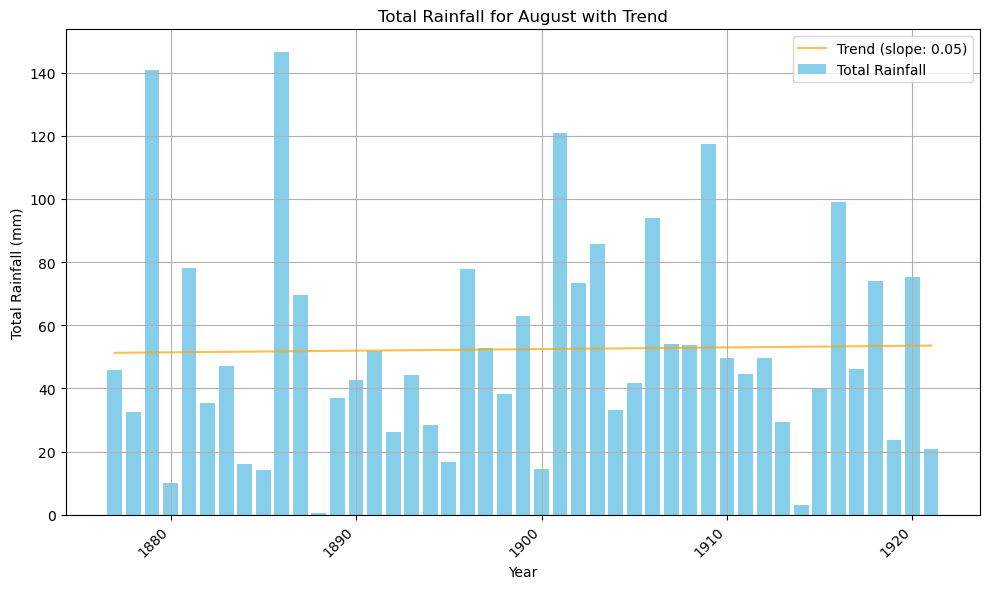

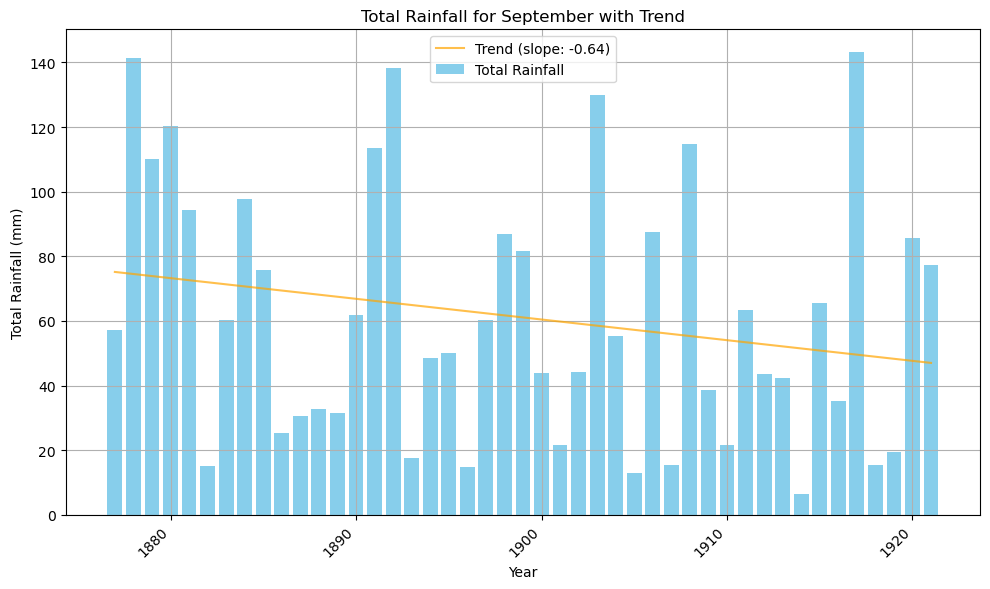

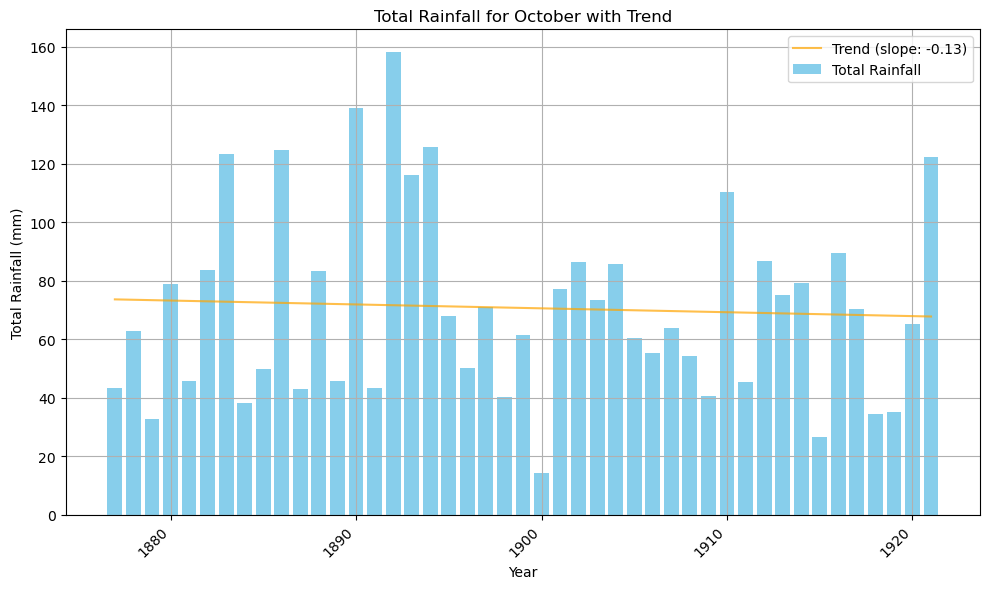

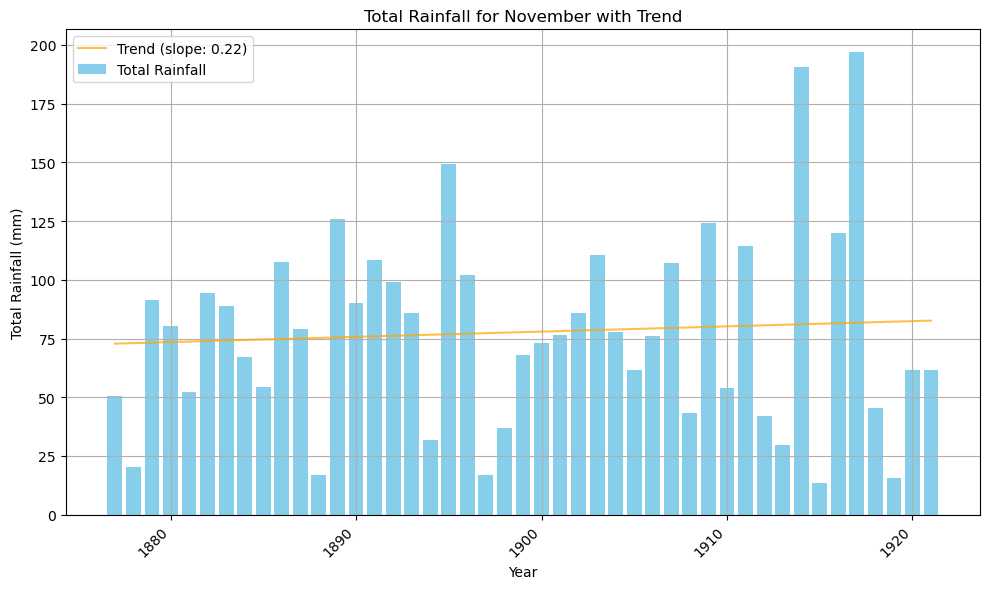

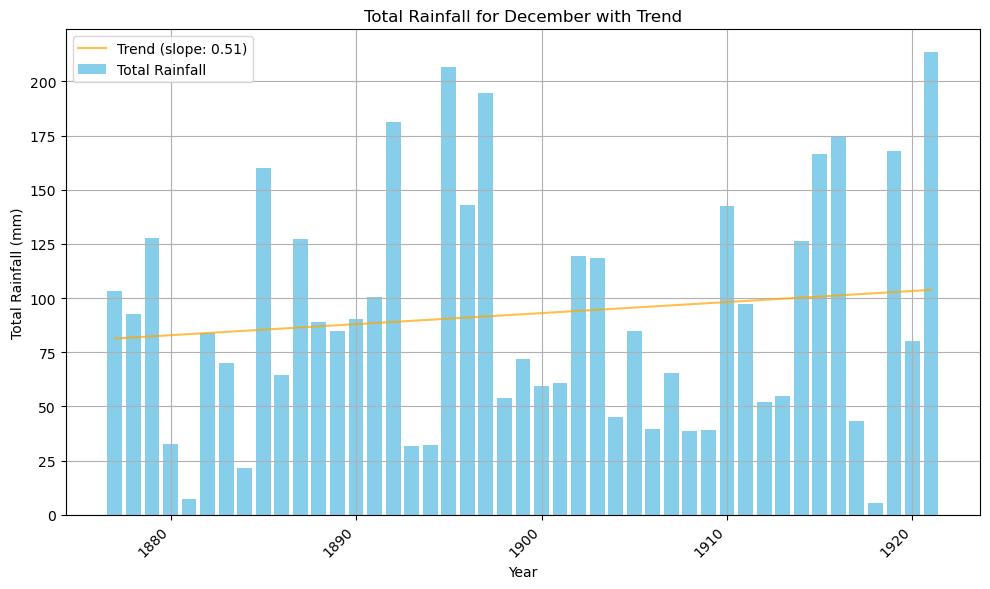

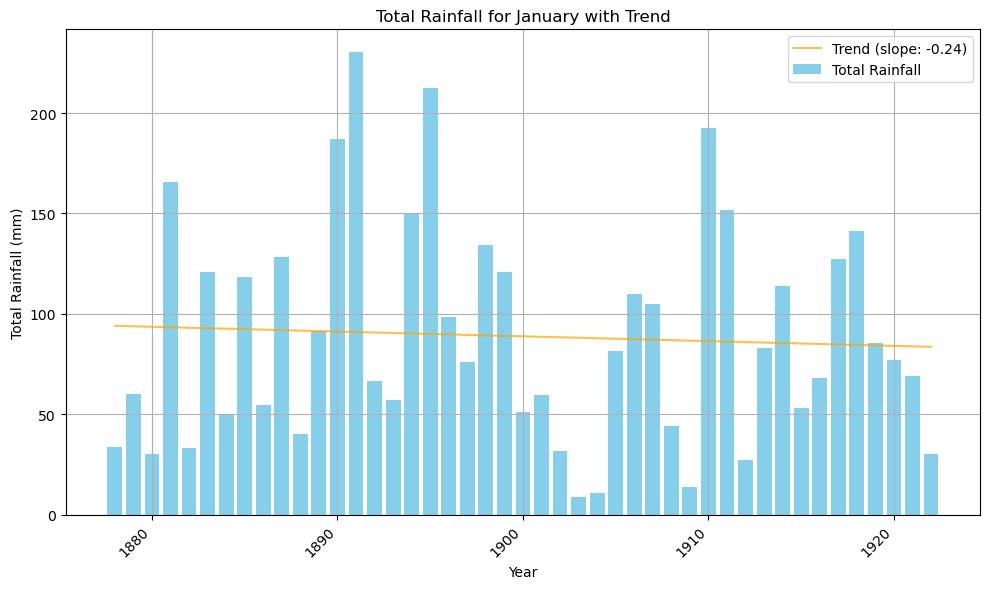

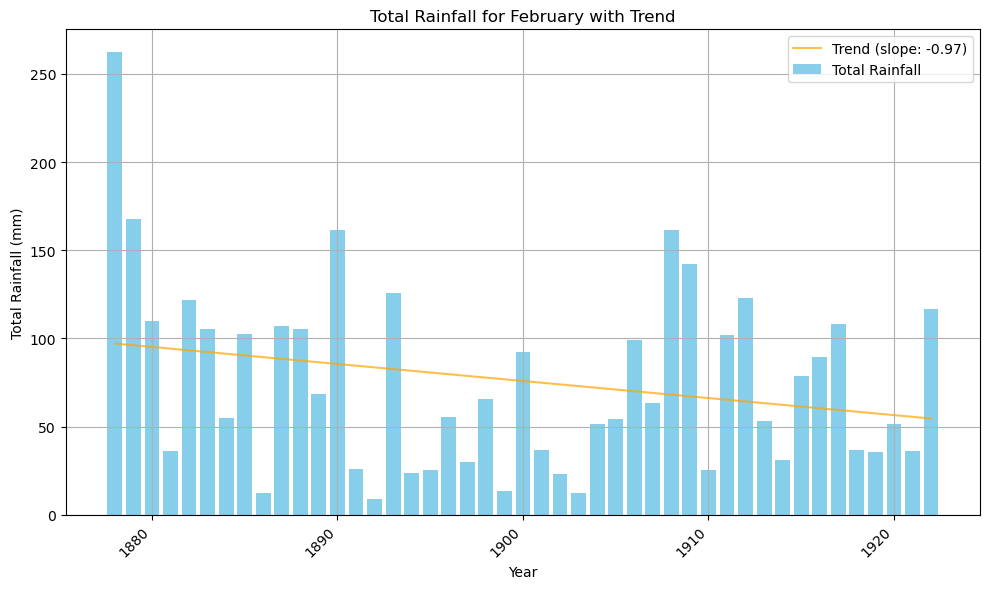

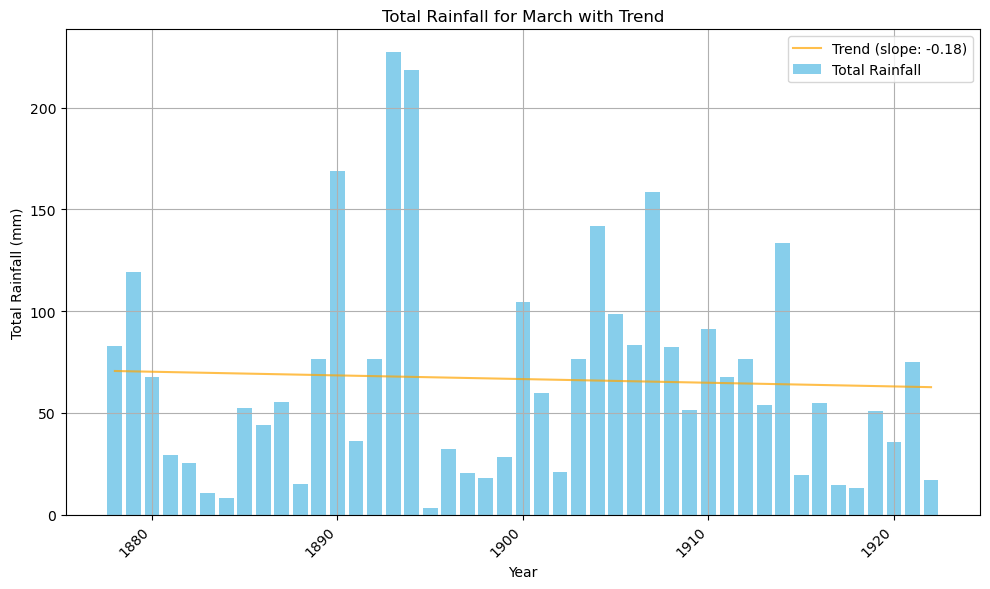

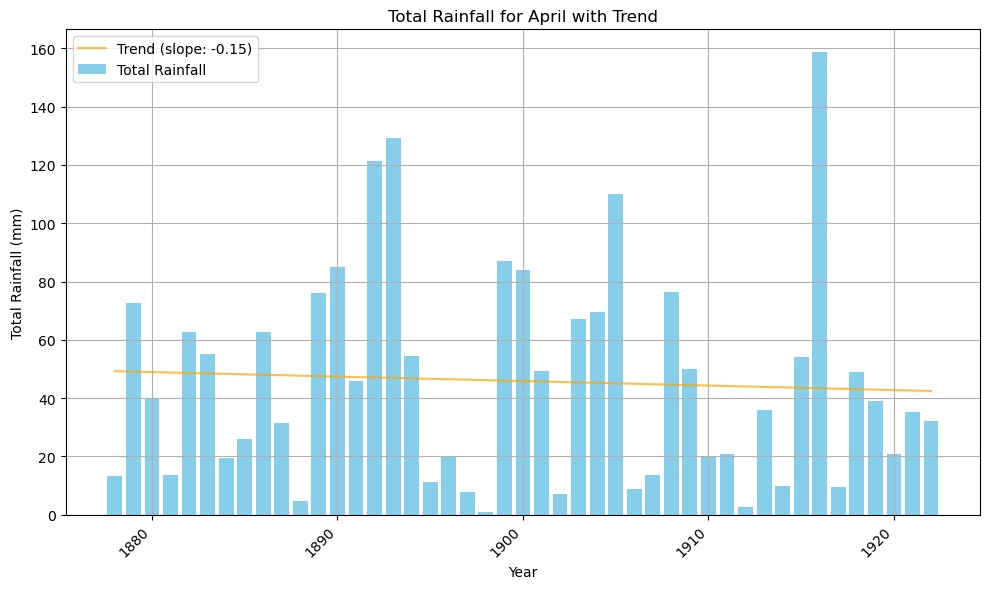

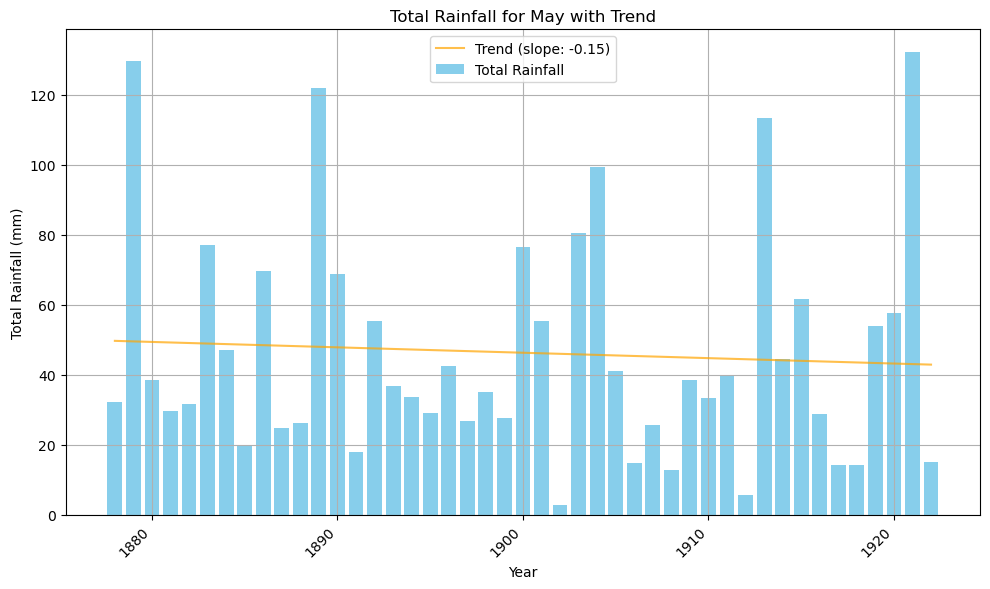

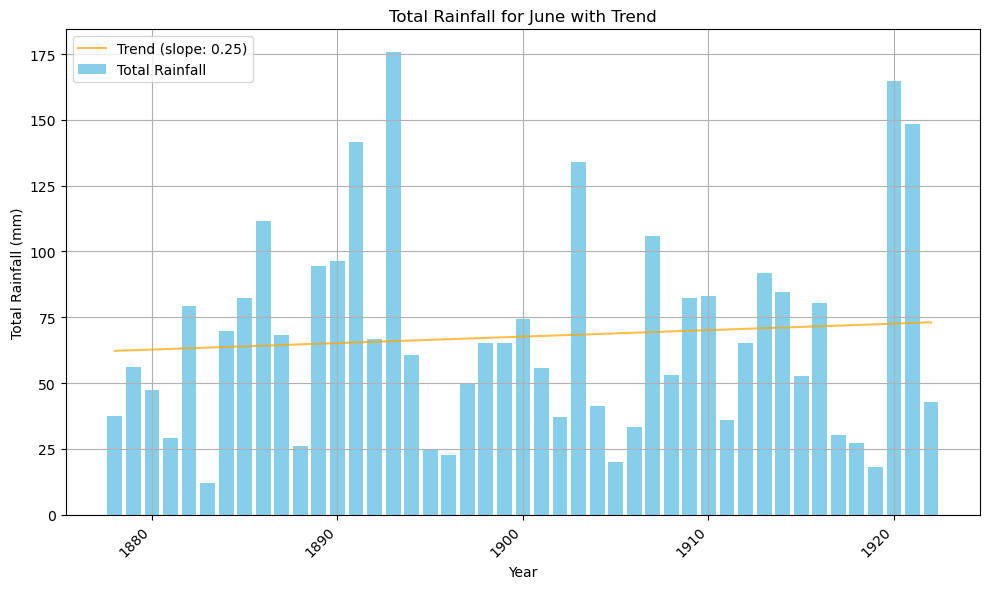

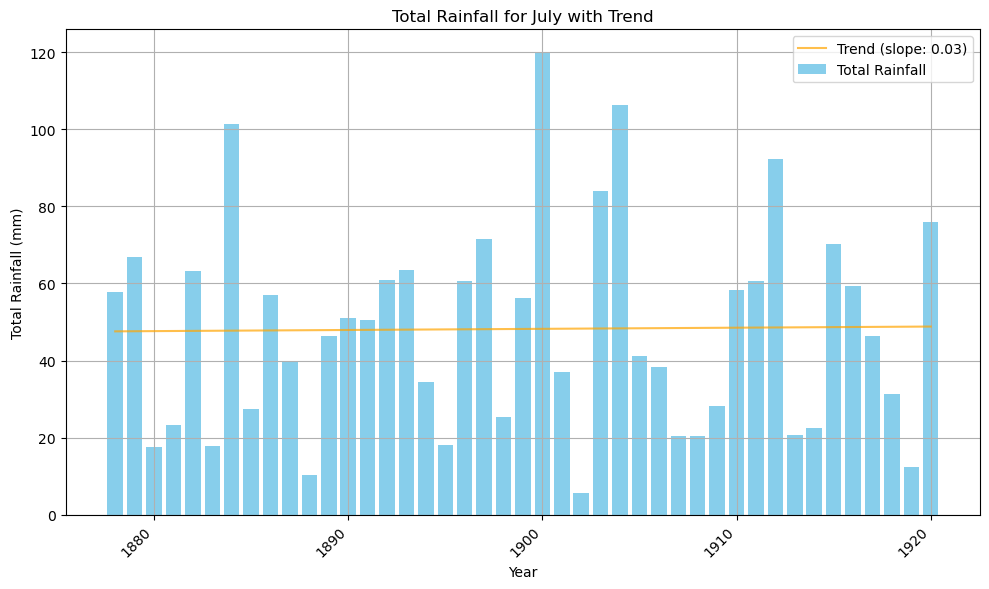

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the saved data
monthly_total_rainfall = pd.read_csv('monthly_total_rainfall.csv')

# Convert 'Year' and 'Month' columns to datetime
monthly_total_rainfall['Year'] = pd.to_datetime(monthly_total_rainfall['Year'], format='%Y')
monthly_total_rainfall['Month'] = pd.to_datetime(monthly_total_rainfall['Month'], format='%m').dt.month_name()

# Iterate over each month and plot the total rainfall for all years as a bar graph with trend line
for month in monthly_total_rainfall['Month'].unique():
    data = monthly_total_rainfall[monthly_total_rainfall['Month'] == month]
    
    # Calculate trend line
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['Year'].dt.year, data['Total Rainfall (mm)'])
    trend_line = intercept + slope * data['Year'].dt.year
    
    plt.figure(figsize=(10, 6))
    plt.bar(data['Year'].dt.year, data['Total Rainfall (mm)'], width=0.8, color='skyblue', label='Total Rainfall')
    plt.plot(data['Year'].dt.year, trend_line, color='orange', label=f'Trend (slope: {slope:.2f})', alpha=0.7)  # Display slope value
    plt.title(f'Total Rainfall for {month} with Trend')
    plt.xlabel('Year')
    plt.ylabel('Total Rainfall (mm)')
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis ticks for better readability
    plt.legend()
    plt.tight_layout()
    plt.show()




C:\Users\manda\AppData\Local\Temp\ipykernel_3616\1716434259.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rainfall['Month'] = pd.to_datetime(filtered_rainfall['Month'], format='%m').dt.month_name()
C:\Users\manda\AppData\Local\Temp\ipykernel_3616\1716434259.py:41: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for year, rainfall in seasonal_total_rainfall.iteritems():
C:\Users\manda\AppData\Local\Temp\ipykernel_3616\1716434259.py:41: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for year, rainfall in seasonal_total_rainfall.iteritems():
C:\Users\manda\AppData\Local\Temp\ipykernel_3616\1716434259.py:41: FutureWarning: iter

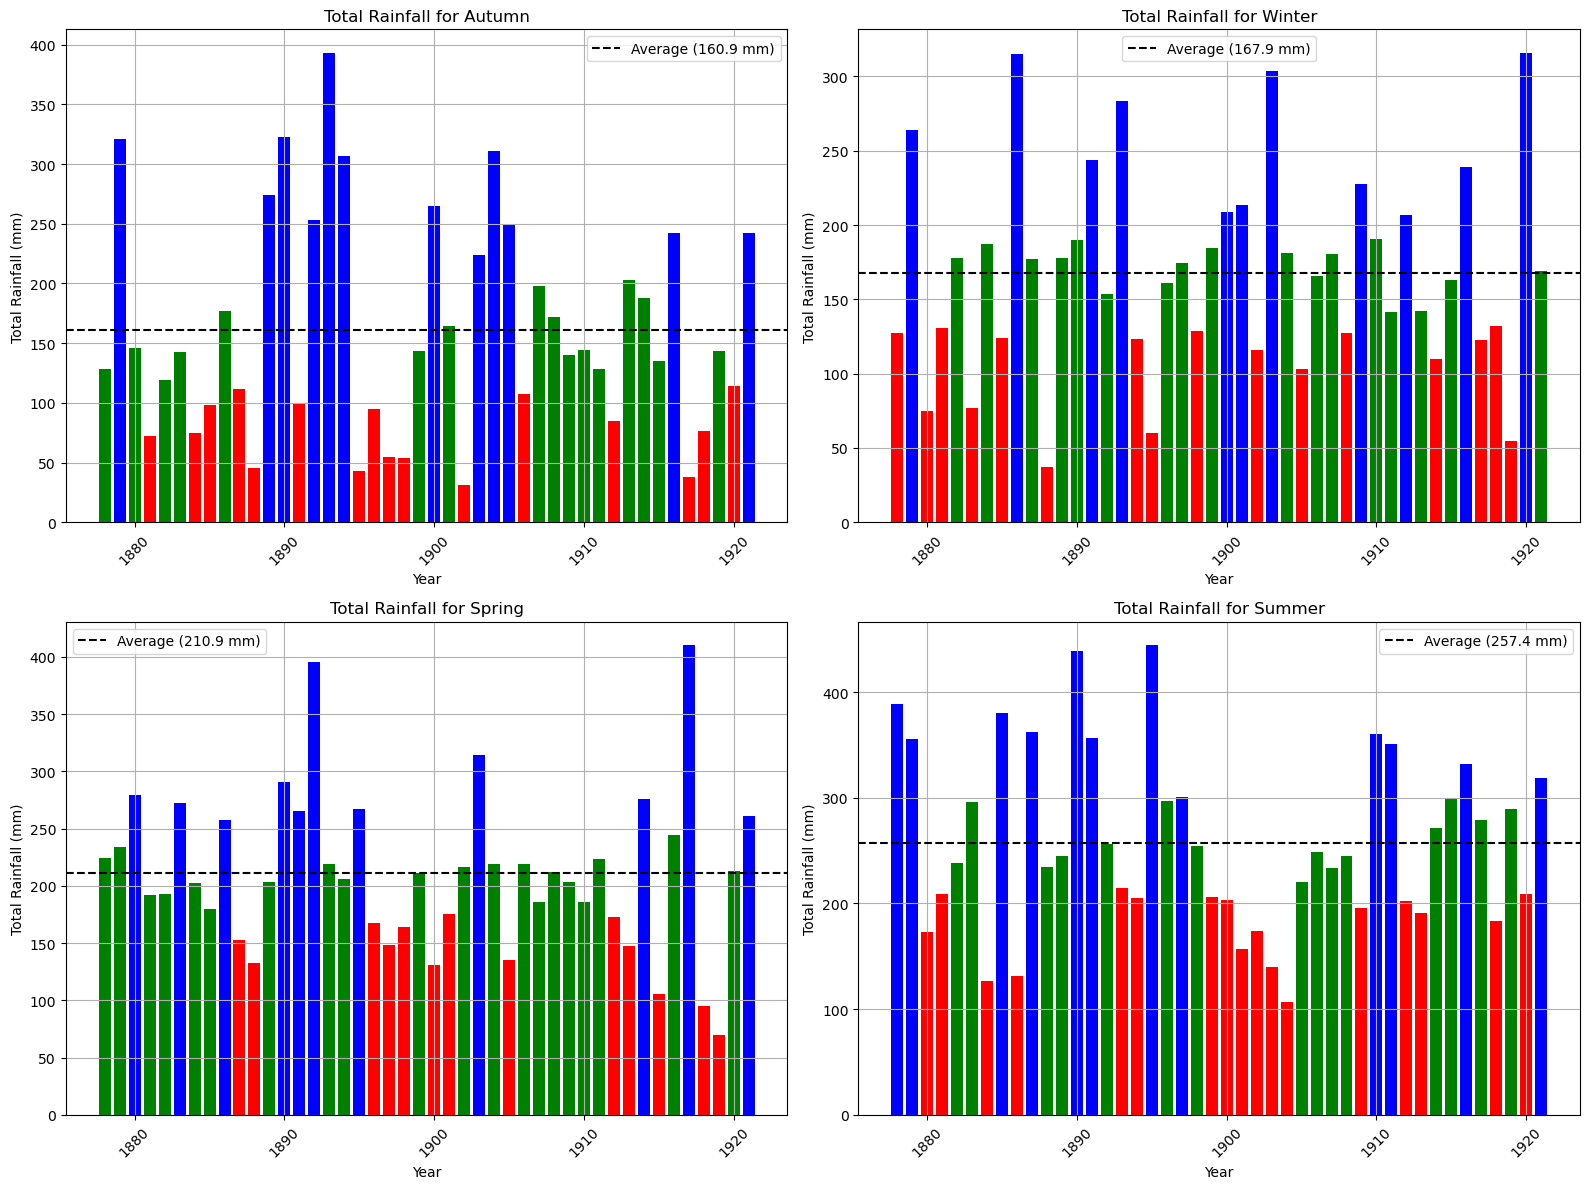

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved data
monthly_total_rainfall = pd.read_csv('monthly_total_rainfall.csv')

# Ensure 'Year' is a datetime type and extract the year component only if it's not already just the year
monthly_total_rainfall['Year'] = pd.to_datetime(monthly_total_rainfall['Year'], format='%Y').dt.year

# Filter out years 1877 and 1922 and winter months of 1921
filtered_rainfall = monthly_total_rainfall[~monthly_total_rainfall['Year'].isin([1877, 1922]) &
                                           ~((monthly_total_rainfall['Year'] == 1921) &
                                             (monthly_total_rainfall['Month'].isin(['June', 'July', 'August'])))]

# Convert 'Month' numbers to month names for matching with seasons
filtered_rainfall['Month'] = pd.to_datetime(filtered_rainfall['Month'], format='%m').dt.month_name()

# Define seasons
seasons = {
    'Autumn': ['March', 'April', 'May'],
    'Winter': ['June', 'July', 'August'],
    'Spring': ['September', 'October', 'November'],
    'Summer': ['December', 'January', 'February']
}

# Prepare the figure for subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()  # Flatten the 2x2 grid into a 1D array for easy iteration
plt.subplots_adjust(hspace=0.4)  # Adjust space between plots

# Aggregate total rainfall values for each season and plot
for i, (season, months) in enumerate(seasons.items()):
    seasonal_data = filtered_rainfall[filtered_rainfall['Month'].isin(months)]
    seasonal_total_rainfall = seasonal_data.groupby('Year')['Total Rainfall (mm)'].sum()
    
    # Calculate average total rainfall for the season
    average_seasonal_rainfall = seasonal_total_rainfall.mean()
    std_seasonal_rainfall = seasonal_total_rainfall.std()
    
    # Plot
    for year, rainfall in seasonal_total_rainfall.iteritems():
        deviation = rainfall - average_seasonal_rainfall
        if deviation < -0.5 * std_seasonal_rainfall:
            color = 'red'
        elif deviation > 0.5 * std_seasonal_rainfall:
            color = 'blue'
        else:
            color = 'green'
        axs[i].bar(year, rainfall, color=color)

    axs[i].axhline(average_seasonal_rainfall, color='black', linestyle='--', label=f'Average ({average_seasonal_rainfall:.1f} mm)')
    axs[i].set_title(f'Total Rainfall for {season}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Total Rainfall (mm)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks for better readability

plt.tight_layout()
plt.show()

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved data
monthly_total_rainfall = pd.read_csv('monthly_total_rainfall.csv')

# Ensure 'Year' is a datetime type and extract the year component only if it's not already just the year
monthly_total_rainfall['Year'] = pd.to_datetime(monthly_total_rainfall['Year'], format='%Y').dt.year

# Filter out years 1877 and 1922 and winter months of 1921
filtered_rainfall = monthly_total_rainfall[~monthly_total_rainfall['Year'].isin([1877, 1922]) &
                                           ~((monthly_total_rainfall['Year'] == 1921) &
                                             (monthly_total_rainfall['Month'].isin(['June', 'July', 'August'])))]

# Convert 'Month' numbers to month names for matching with seasons
filtered_rainfall['Month'] = pd.to_datetime(filtered_rainfall['Month'], format='%m').dt.month_name()

# Define seasons
seasons = {
    'Autumn': ['March', 'April', 'May'],
    'Winter': ['June', 'July', 'August'],
    'Spring': ['September', 'October', 'November'],
    'Summer': ['December', 'January', 'February']
}

# Initialize a dictionary to store the rainfall status for each season in each year
rainfall_status = {season: [] for season in seasons.keys()}

# Aggregate total rainfall values for each season
for season, months in seasons.items():
    seasonal_data = filtered_rainfall[filtered_rainfall['Month'].isin(months)]
    seasonal_total_rainfall = seasonal_data.groupby('Year')['Total Rainfall (mm)'].sum()
    
    # Calculate average total rainfall for the season
    average_seasonal_rainfall = seasonal_total_rainfall.mean()
    std_seasonal_rainfall = seasonal_total_rainfall.std()
    
    # Determine the rainfall status for each year in the season
    for year, rainfall in seasonal_total_rainfall.iteritems():
        deviation = rainfall - average_seasonal_rainfall
        if deviation < -0.5 * std_seasonal_rainfall:
            status = 'Below Normal'
        elif deviation > 0.5 * std_seasonal_rainfall:
            status = 'Above Normal'
        else:
            status = 'Normal'
        rainfall_status[season].append(status)

# Create a DataFrame from the rainfall status dictionary
rainfall_status_df = pd.DataFrame(rainfall_status)

# Display the DataFrame
print(rainfall_status_df)


          Autumn        Winter        Spring        Summer
0         Normal  Below Normal        Normal  Above Normal
1   Above Normal  Above Normal        Normal  Above Normal
2         Normal  Below Normal  Above Normal  Below Normal
3   Below Normal  Below Normal        Normal  Below Normal
4         Normal        Normal        Normal        Normal
5         Normal  Below Normal  Above Normal        Normal
6   Below Normal        Normal        Normal  Below Normal
7   Below Normal  Below Normal        Normal  Above Normal
8         Normal  Above Normal  Above Normal  Below Normal
9   Below Normal        Normal  Below Normal  Above Normal
10  Below Normal  Below Normal  Below Normal        Normal
11  Above Normal        Normal        Normal        Normal
12  Above Normal        Normal  Above Normal  Above Normal
13  Below Normal  Above Normal  Above Normal  Above Normal
14  Above Normal        Normal  Above Normal        Normal
15  Above Normal  Above Normal        Normal  Below Norm

C:\Users\manda\AppData\Local\Temp\ipykernel_3616\334210734.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_rainfall['Month'] = pd.to_datetime(filtered_rainfall['Month'], format='%m').dt.month_name()
C:\Users\manda\AppData\Local\Temp\ipykernel_3616\334210734.py:39: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for year, rainfall in seasonal_total_rainfall.iteritems():
C:\Users\manda\AppData\Local\Temp\ipykernel_3616\334210734.py:39: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for year, rainfall in seasonal_total_rainfall.iteritems():
C:\Users\manda\AppData\Local\Temp\ipykernel_3616\334210734.py:39: FutureWarning: iteritem

In [13]:
import numpy as np

# Define a function to calculate coefficient of variation
def coefficient_of_variation(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    cv = std_dev / mean
    return cv

# Initialize a dictionary to store the coefficient of variation for each season
total_cv = {season: [] for season in seasons.keys()}

# Calculate coefficient of variation for each year within each season
for season, months in seasons.items():
    seasonal_data = filtered_rainfall[filtered_rainfall['Month'].isin(months)]
    grouped_data = seasonal_data.groupby('Year')['Total Rainfall (mm)'].apply(list)
    seasonal_cv = grouped_data.apply(coefficient_of_variation)
    seasonal_cv = seasonal_cv[~seasonal_cv.index.isin([1877, 1922])]  # Exclude years 1877 and 1922
    total_cv[season] = np.mean(seasonal_cv)

# Display total coefficient of variation for each season
for season, cv in total_cv.items():
    print(f"Season: {season}, Total Coefficient of Variation: {cv:.2f}")


Season: Autumn, Total Coefficient of Variation: 0.48
Season: Winter, Total Coefficient of Variation: 0.43
Season: Spring, Total Coefficient of Variation: 0.42
Season: Summer, Total Coefficient of Variation: 0.50


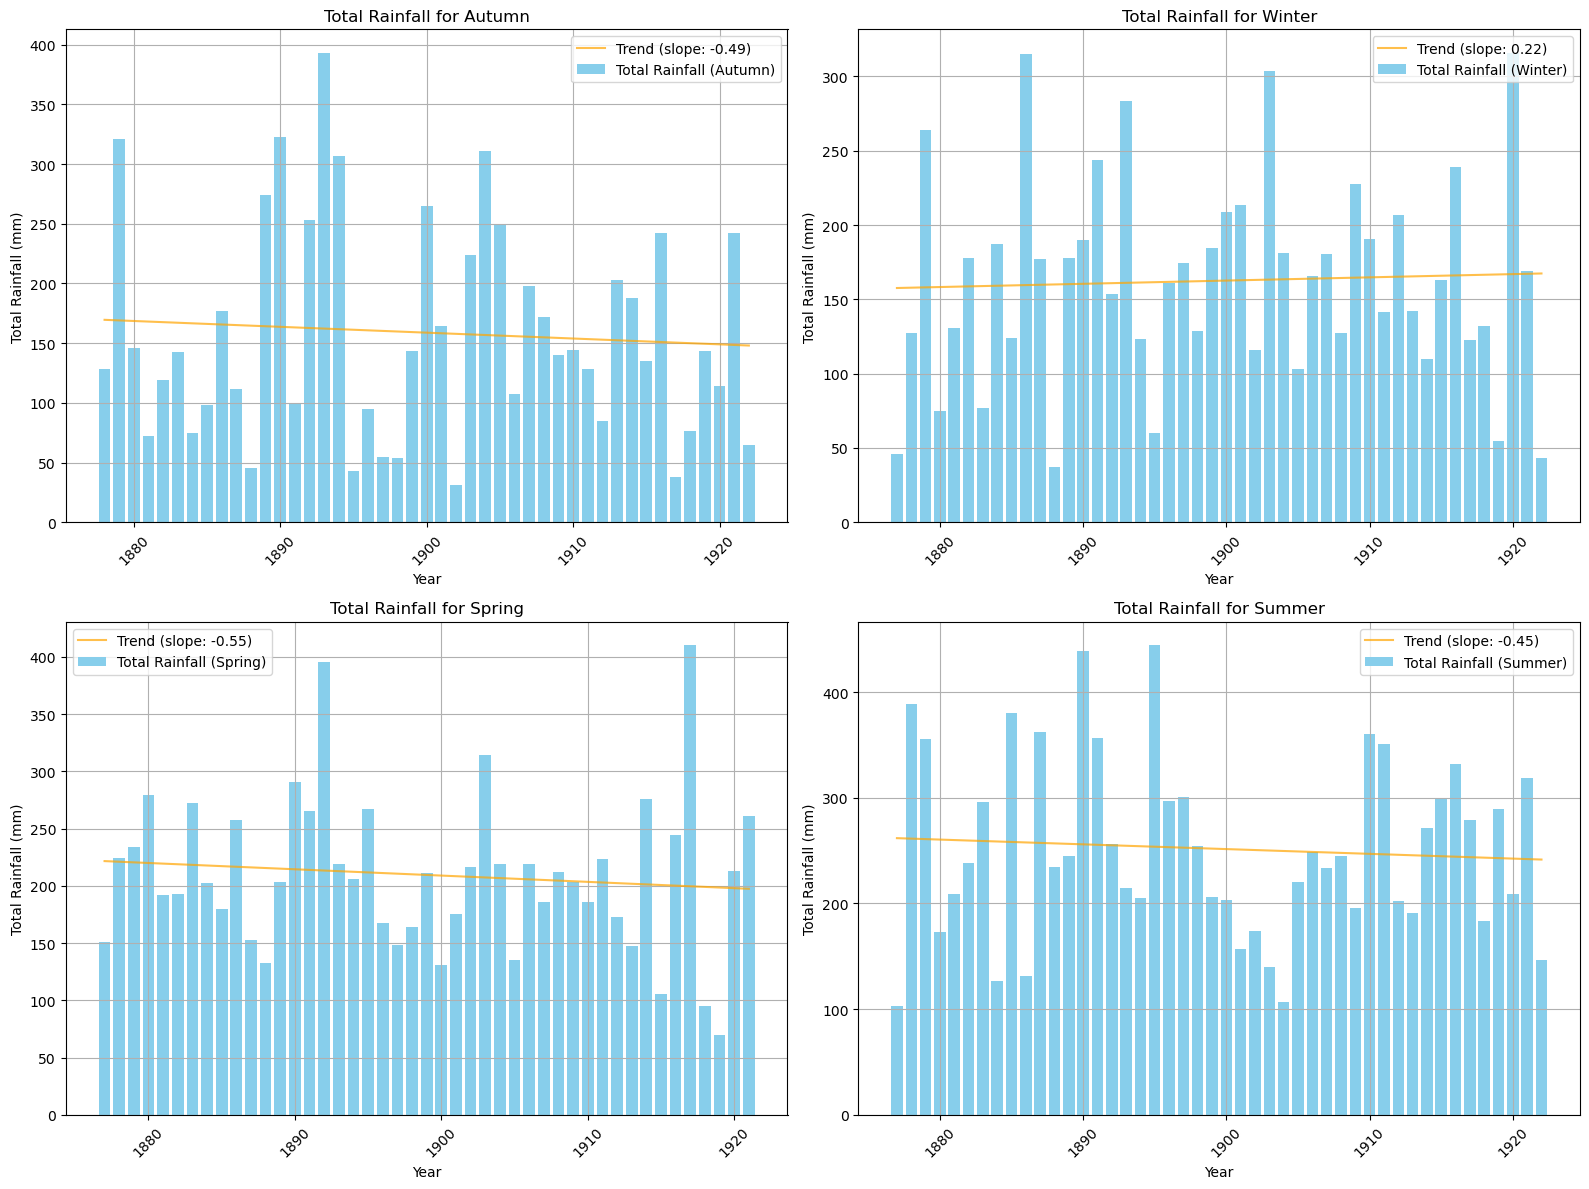

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the saved data
monthly_total_rainfall = pd.read_csv('monthly_total_rainfall.csv')

# Ensure 'Year' is a datetime type and extract the year component only if it's not already just the year
monthly_total_rainfall['Year'] = pd.to_datetime(monthly_total_rainfall['Year'], format='%Y').dt.year

# Convert 'Month' numbers to month names for matching with seasons
monthly_total_rainfall['Month'] = pd.to_datetime(monthly_total_rainfall['Month'], format='%m').dt.month_name()

# Define seasons
seasons = {
    'Autumn': ['March', 'April', 'May'],
    'Winter': ['June', 'July', 'August'],
    'Spring': ['September', 'October', 'November'],
    'Summer': ['December', 'January', 'February']
}

# Prepare the figure for subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()  # Flatten the 2x2 grid into a 1D array for easy iteration
plt.subplots_adjust(hspace=0.4)  # Adjust space between plots

# Aggregate total rainfall values for each season and plot
for i, (season, months) in enumerate(seasons.items()):
    seasonal_data = monthly_total_rainfall[monthly_total_rainfall['Month'].isin(months)]
    seasonal_total_rainfall = seasonal_data.groupby('Year')['Total Rainfall (mm)'].sum()
    
    # Calculate trend line
    slope, intercept, r_value, p_value, std_err = stats.linregress(seasonal_total_rainfall.index, seasonal_total_rainfall.values)
    trend_line = intercept + slope * seasonal_total_rainfall.index

    # Plot
    axs[i].bar(seasonal_total_rainfall.index, seasonal_total_rainfall.values, color='skyblue', label=f'Total Rainfall ({season})')
    axs[i].plot(seasonal_total_rainfall.index, trend_line, color='orange', label=f'Trend (slope: {slope:.2f})', alpha=0.7)  # Display slope value
    axs[i].set_title(f'Total Rainfall for {season}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Total Rainfall (mm)')
    axs[i].legend()
    axs[i].grid(True)
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis ticks for better readability

plt.tight_layout()
plt.show()


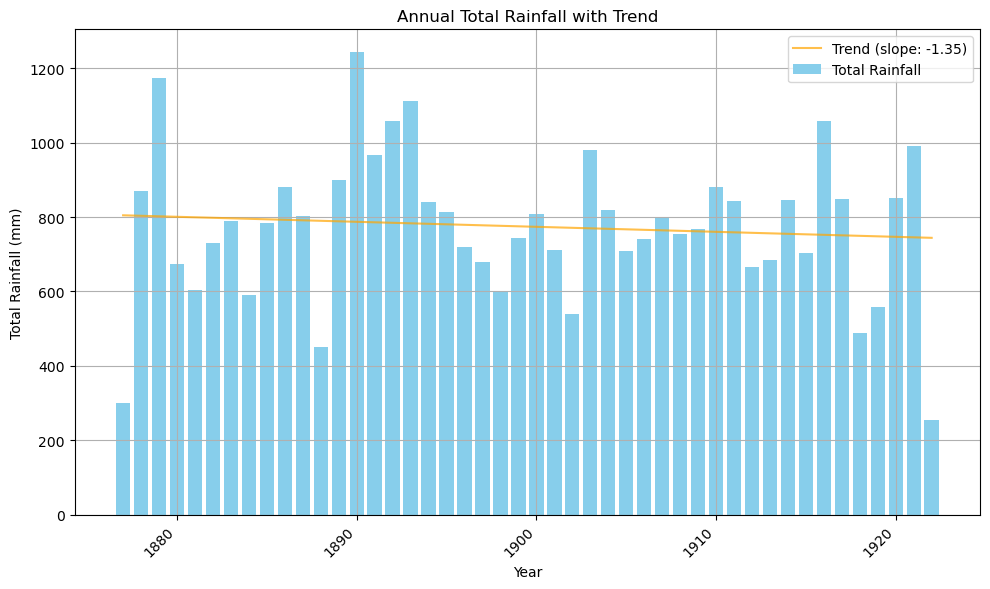

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the saved data
monthly_total_rainfall = pd.read_csv('monthly_total_rainfall.csv')

# Convert 'Year' column to datetime
monthly_total_rainfall['Year'] = pd.to_datetime(monthly_total_rainfall['Year'], format='%Y')

# Aggregate total rainfall values for each year
annual_total_rainfall = monthly_total_rainfall.groupby('Year')['Total Rainfall (mm)'].sum()

# Calculate trend line for annual total rainfall
slope, intercept, r_value, p_value, std_err = stats.linregress(annual_total_rainfall.index.year, annual_total_rainfall.values)
trend_line = intercept + slope * annual_total_rainfall.index.year

# Plot the graph for annual total rainfall with trend line
plt.figure(figsize=(10, 6))
plt.bar(annual_total_rainfall.index.year, annual_total_rainfall.values, color='skyblue', label='Total Rainfall')
plt.plot(annual_total_rainfall.index.year, trend_line, color='orange', label=f'Trend (slope: {slope:.2f})', alpha=0.7)  # Display slope value
plt.title('Annual Total Rainfall with Trend')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis ticks for better readability
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\manda\AppData\Local\Temp\ipykernel_3616\763512326.py:27: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for year, rainfall in annual_total_rainfall.iteritems():


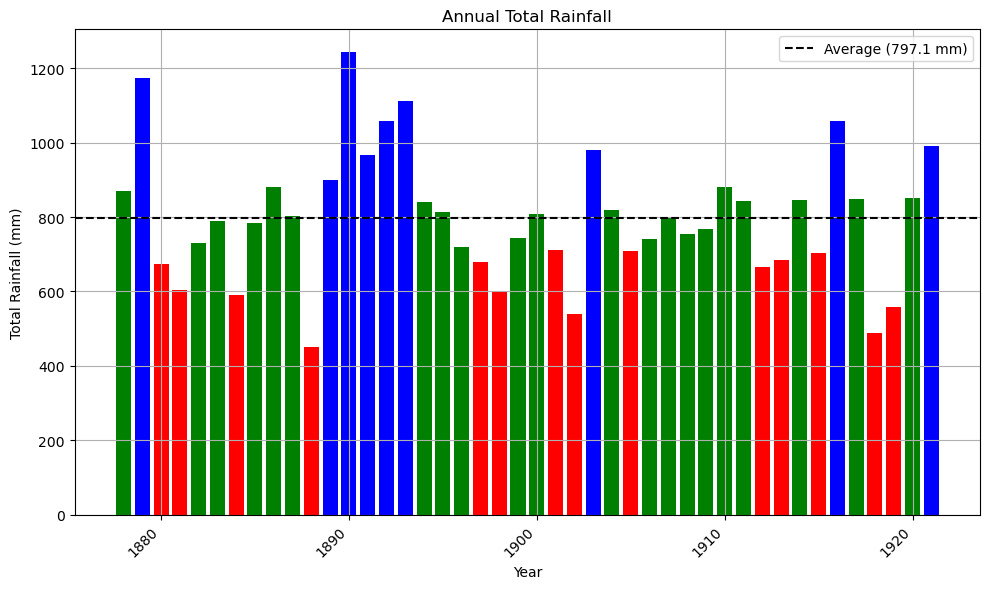

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the saved data
monthly_total_rainfall = pd.read_csv('monthly_total_rainfall.csv')

# Convert 'Year' column to datetime
monthly_total_rainfall['Year'] = pd.to_datetime(monthly_total_rainfall['Year'], format='%Y')

# Filter out years 1877 and 1922
monthly_total_rainfall = monthly_total_rainfall[~monthly_total_rainfall['Year'].dt.year.isin([1877, 1922])]

# Aggregate total rainfall values for each year
annual_total_rainfall = monthly_total_rainfall.groupby('Year')['Total Rainfall (mm)'].sum()

# Calculate average total annual rainfall and standard deviation
average_annual_rainfall = annual_total_rainfall.mean()
std_annual_rainfall = annual_total_rainfall.std()

# Plot the graph for annual total rainfall with average line
plt.figure(figsize=(10, 6))

# Plot average line
plt.axhline(average_annual_rainfall, color='black', linestyle='--', label=f'Average ({average_annual_rainfall:.1f} mm)')

# Plot annual total rainfall bars
for year, rainfall in annual_total_rainfall.iteritems():
    deviation = rainfall - average_annual_rainfall
    if deviation <= -0.5 * std_annual_rainfall:
        color = 'red'
    elif deviation >= 0.5 * std_annual_rainfall:
        color = 'blue'
    else:
        color = 'green'
    plt.bar(year.year, rainfall, color=color)

plt.title('Annual Total Rainfall')
plt.xlabel('Year')
plt.ylabel('Total Rainfall (mm)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis ticks for better readability
plt.legend()
plt.tight_layout()
plt.show()

 

In [17]:
import pandas as pd

# Convert 'Date' column to datetime type
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Filter out rows with missing maximum temperature data (-99.9)
missing_max_temp = df[df['Maximum.Temp..C.'] == -99.9]

# Find consecutive sequences of missing values for maximum temperature
missing_max_temp['Date_diff'] = missing_max_temp['Date'].diff().dt.days
consecutive_missing_max_temp = missing_max_temp.groupby((missing_max_temp['Date_diff'] != 1).cumsum())['Date'].agg(['first', 'last'])

# Calculate number of days for consecutive missing values of maximum temperature
consecutive_missing_max_temp['Number of Days'] = (consecutive_missing_max_temp['last'] - consecutive_missing_max_temp['first']).dt.days + 1

# Separate consecutive sequences from single-day missing values for maximum temperature
consecutive_missing_max_temp = consecutive_missing_max_temp.reset_index(drop=True)
single_day_missing_max_temp = missing_max_temp[~missing_max_temp['Date'].isin(consecutive_missing_max_temp['first'])]

# Print consecutive sequences of missing values for maximum temperature with number of days
print("Consecutive Missing Values for Maximum Temperature:")
print(consecutive_missing_max_temp[['first', 'last', 'Number of Days']].to_string(index=False))

# Filter out rows with missing minimum temperature data (-99.9)
missing_min_temp = df[df['Minimum.Temp..C.'] == -99.9]

# Find consecutive sequences of missing values for minimum temperature
missing_min_temp['Date_diff'] = missing_min_temp['Date'].diff().dt.days
consecutive_missing_min_temp = missing_min_temp.groupby((missing_min_temp['Date_diff'] != 1).cumsum())['Date'].agg(['first', 'last'])

# Calculate number of days for consecutive missing values of minimum temperature
consecutive_missing_min_temp['Number of Days'] = (consecutive_missing_min_temp['last'] - consecutive_missing_min_temp['first']).dt.days + 1

# Separate consecutive sequences from single-day missing values for minimum temperature
consecutive_missing_min_temp = consecutive_missing_min_temp.reset_index(drop=True)
single_day_missing_min_temp = missing_min_temp[~missing_min_temp['Date'].isin(consecutive_missing_min_temp['first'])]

# Print consecutive sequences of missing values for minimum temperature with number of days
print("Consecutive Missing Values for Minimum Temperature:")
print(consecutive_missing_min_temp[['first', 'last', 'Number of Days']].to_string(index=False))


Consecutive Missing Values for Maximum Temperature:
     first       last  Number of Days
1877-01-01 1877-06-30             181
1877-07-04 1877-07-12               9
1878-02-22 1878-02-22               1
1878-03-25 1878-03-25               1
1879-01-13 1879-01-13               1
1879-09-25 1879-10-19              25
1880-12-02 1880-12-02               1
1881-10-20 1881-10-20               1
1882-10-27 1882-10-27               1
1883-03-07 1883-03-07               1
1883-03-21 1883-03-22               2
1884-11-28 1884-11-28               1
1885-05-18 1885-05-18               1
1885-08-31 1885-09-20              21
1886-09-29 1886-09-29               1
1886-11-02 1886-11-02               1
1887-09-02 1887-09-02               1
1887-11-15 1887-11-15               1
1888-03-05 1888-03-06               2
1888-06-14 1888-06-14               1
1888-07-31 1888-07-31               1
1888-08-06 1888-08-06               1
1889-01-30 1889-02-15              17
1889-03-15 1889-03-15               

C:\Users\manda\AppData\Local\Temp\ipykernel_3616\1424466711.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_max_temp['Date_diff'] = missing_max_temp['Date'].diff().dt.days
C:\Users\manda\AppData\Local\Temp\ipykernel_3616\1424466711.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  missing_min_temp['Date_diff'] = missing_min_temp['Date'].diff().dt.days


In [18]:
import pandas as pd

# Assuming 'df' is your original DataFrame containing temperature data

# Create a DataFrame containing all unique combinations of years and months
all_months = pd.DataFrame([(year, month) for year in df['Year'].unique() for month in range(1, 13)], columns=['Year', 'Month'])

# Merge all_months with monthly_missing_values to include months with no missing values
merged_months = pd.merge(all_months, monthly_missing_values, on=['Year', 'Month'], how='left')

# Fill missing values with 0 for months with no missing values
merged_months['MissingDays'] = merged_months['MissingDays'].fillna(0)

# Filter out months with missing values ranging from 0 to 5 days (inclusive)
filtered_months = merged_months[(merged_months['MissingDays'] >= 0) & (merged_months['MissingDays'] <= 5)]

# Filter out months with missing values equal to or more than 3 days consecutively
filtered_months = filtered_months[~filtered_months.apply(lambda x: consecutive_missing_values(df[(df['Year'] == x['Year']) & (df['Month'] == x['Month'])]['Maximum.Temp..C.'], 3) or consecutive_missing_values(df[(df['Year'] == x['Year']) & (df['Month'] == x['Month'])]['Minimum.Temp..C.'], 3), axis=1)]

# Merge with the original DataFrame to get the temperature data for the remaining months
merged_df = pd.merge(df, filtered_months, on=['Year', 'Month'], how='inner')

# Filter out rows with missing maximum and minimum temperature data (-99.9) for the remaining months
filtered_df = merged_df[(merged_df['Maximum.Temp..C.'] != -99.9) & (merged_df['Minimum.Temp..C.'] != -99.9)]

# Calculate average maximum and minimum temperatures for each remaining month
monthly_avg_temp = filtered_df.groupby(['Year', 'Month']).agg({'Maximum.Temp..C.': 'mean', 'Minimum.Temp..C.': 'mean'}).reset_index()

# Calculate average temperature by adding average maximum and minimum temperatures and dividing by 2
monthly_avg_temp['Average Temp'] = (monthly_avg_temp['Maximum.Temp..C.'] + monthly_avg_temp['Minimum.Temp..C.']) / 2

# Calculate average temperature by adding average maximum and minimum temperatures and dividing by 2
monthly_avg_temp['Maximum.Temp..C.'] = monthly_avg_temp['Maximum.Temp..C.'].astype(int)
monthly_avg_temp['Minimum.Temp..C.'] = monthly_avg_temp['Minimum.Temp..C.'].astype(int)
monthly_avg_temp['Average Temp'] = ((monthly_avg_temp['Maximum.Temp..C.'] + monthly_avg_temp['Minimum.Temp..C.']) / 2).astype(int)

# Display the average temperature values for each month
print("Average temperature values for each month with less than or equal to 5 missing days and no 3 or more consecutive missing days:")
print(monthly_avg_temp.to_string(index=False))

# Save the DataFrame to a CSV file
monthly_avg_temp.to_csv('monthly_avg_temp.csv', index=False, header=['Year', 'Month', 'Average Max Temp (C)', 'Average Min Temp (C)', 'Average Temp (C)'])


Average temperature values for each month with less than or equal to 5 missing days and no 3 or more consecutive missing days:
 Year  Month  Maximum.Temp..C.  Minimum.Temp..C.  Average Temp
 1877      8                15                 0             7
 1877      9                16                 2             9
 1877     10                20                 5            12
 1877     11                27                10            18
 1877     12                28                12            20
 1878      1                30                13            21
 1878      2                25                14            19
 1878      3                24                13            18
 1878      4                20                 7            13
 1878      5                15                 3             9
 1878      6                 9                -1             4
 1878      7                11                 0             5
 1878      8                13                 1      

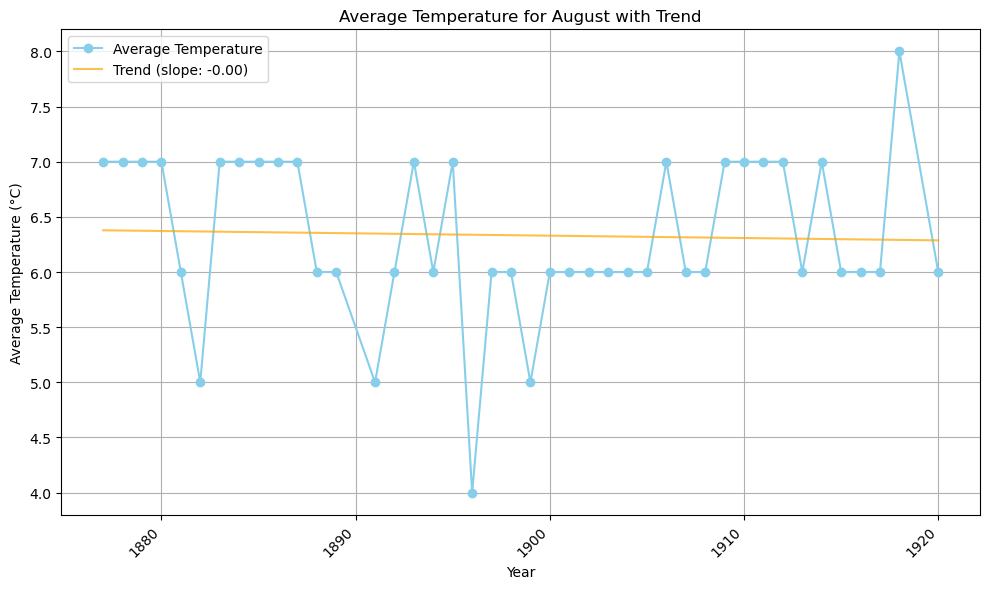

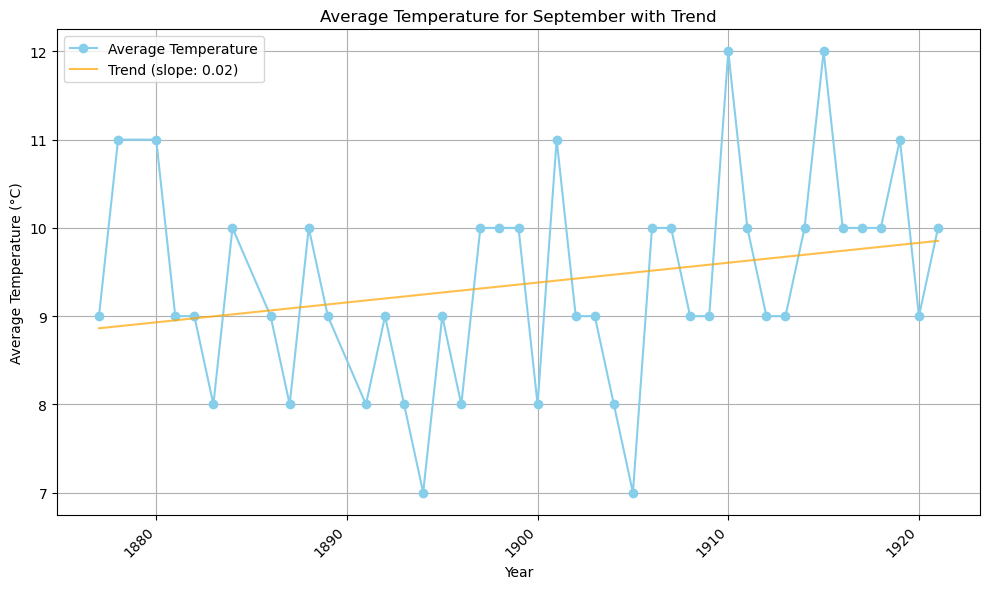

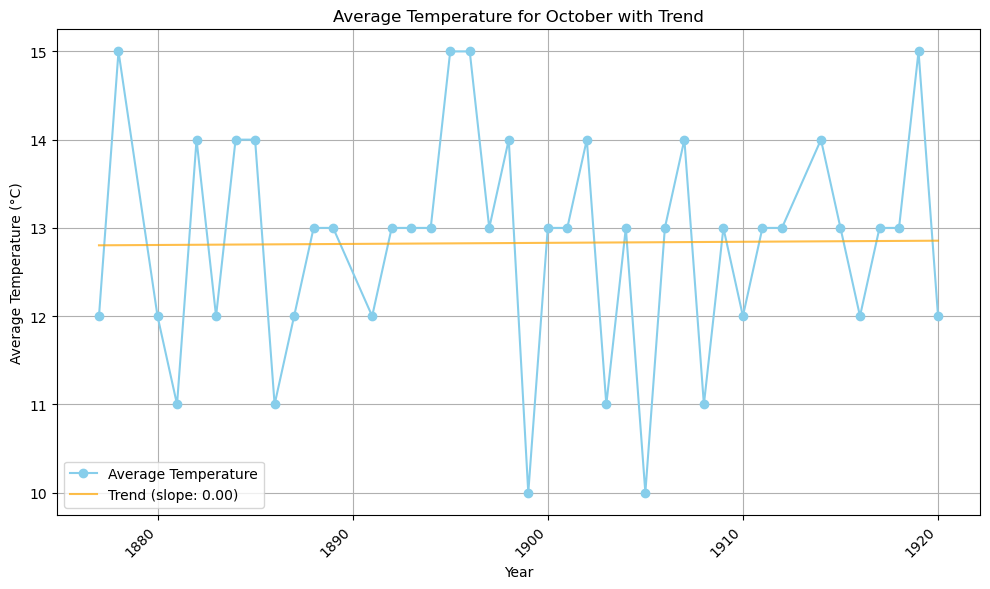

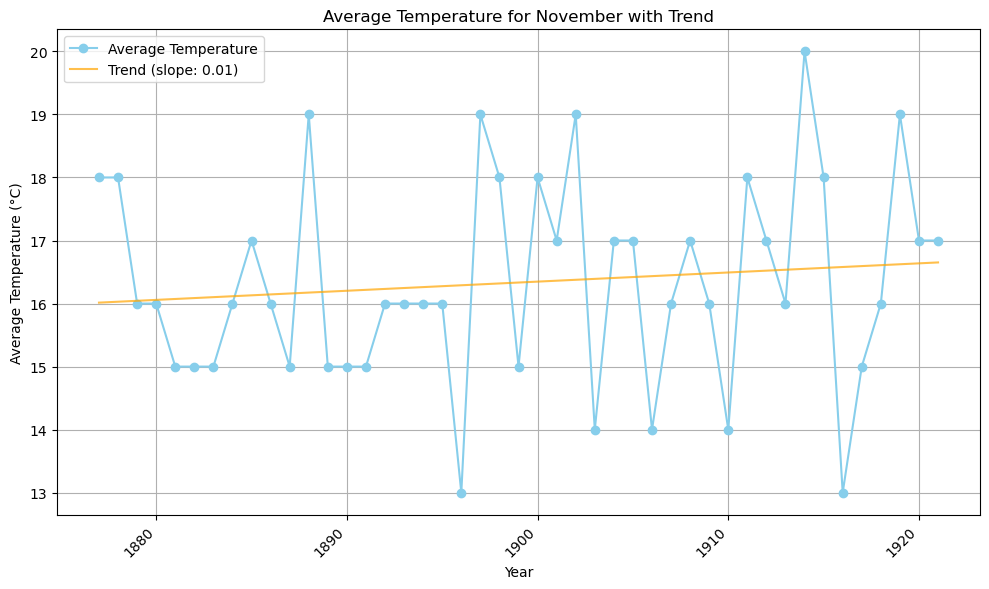

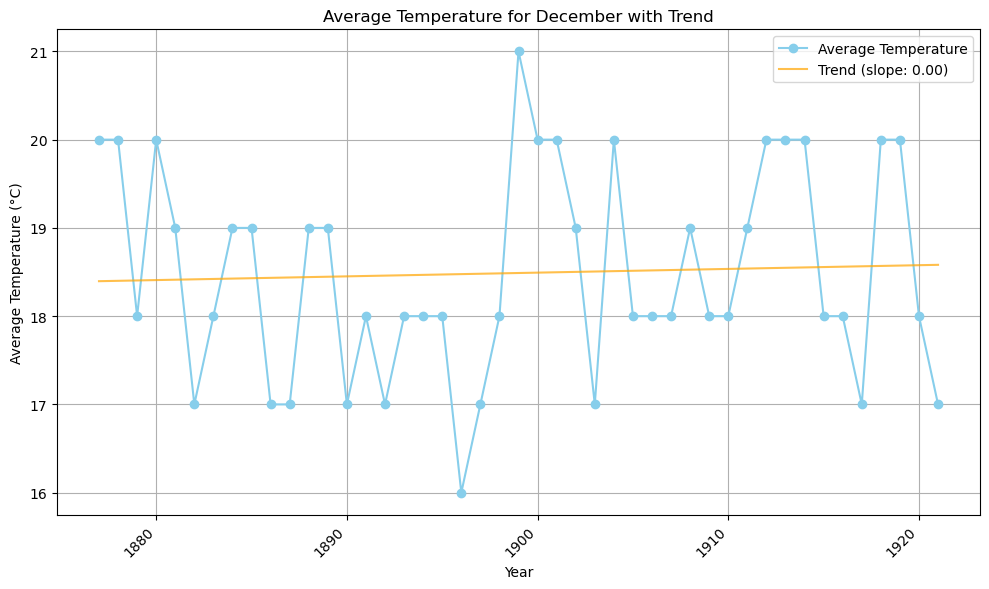

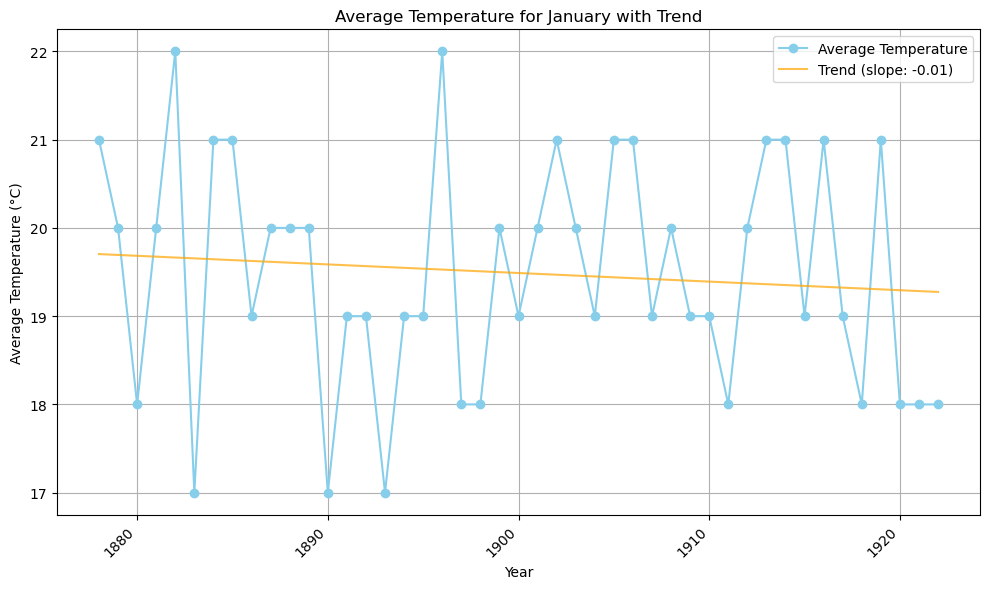

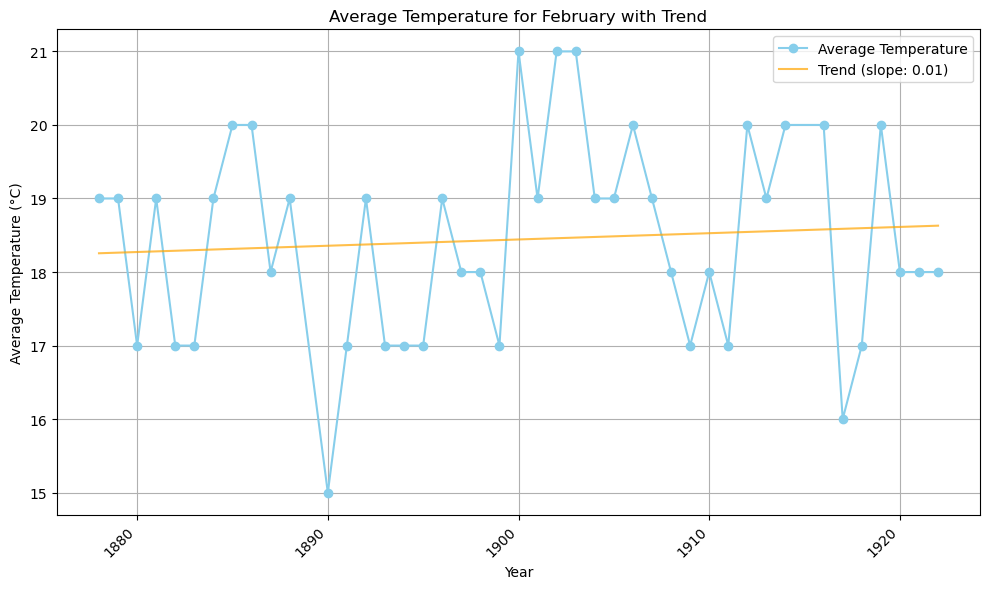

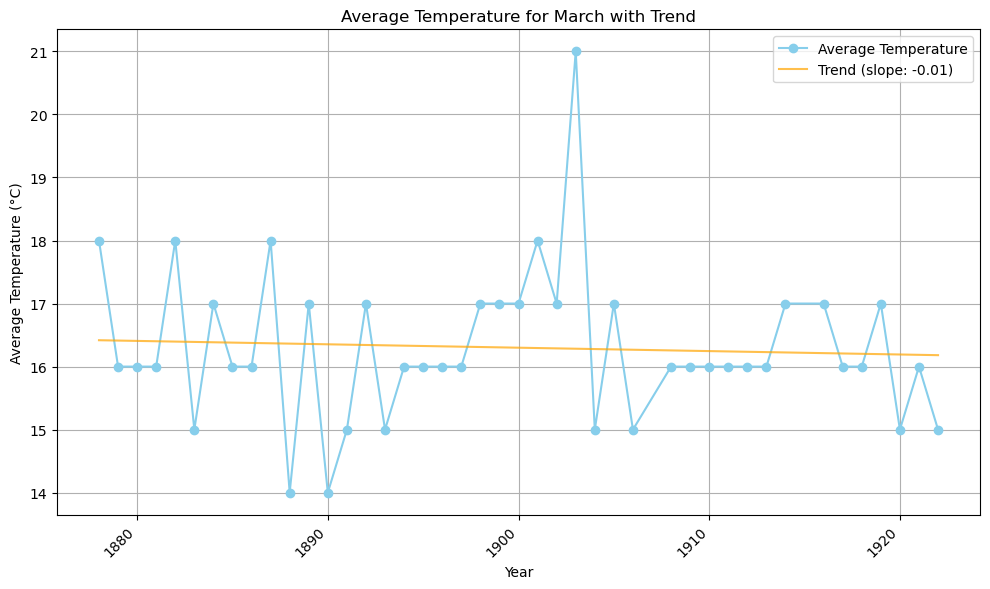

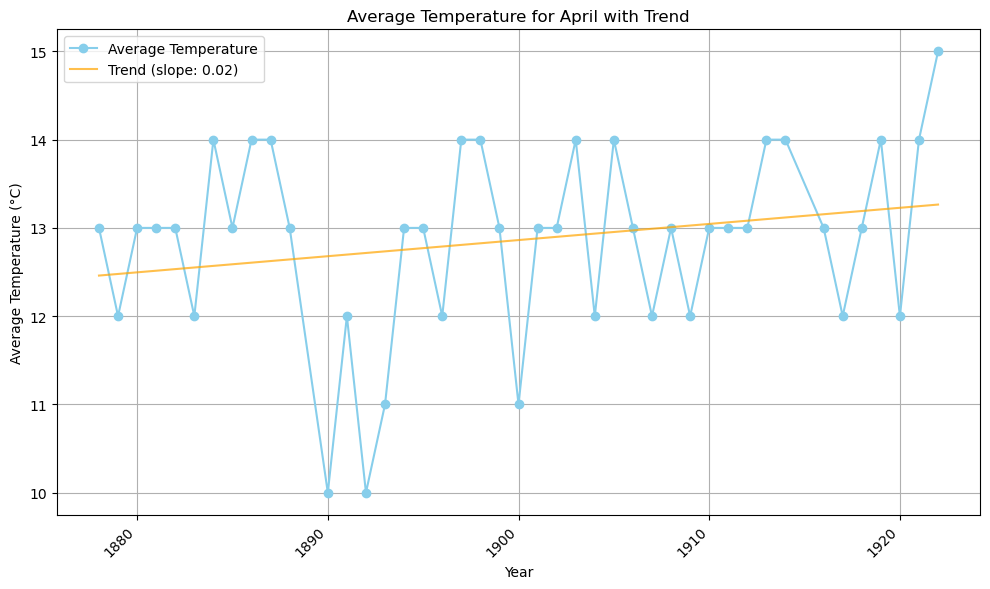

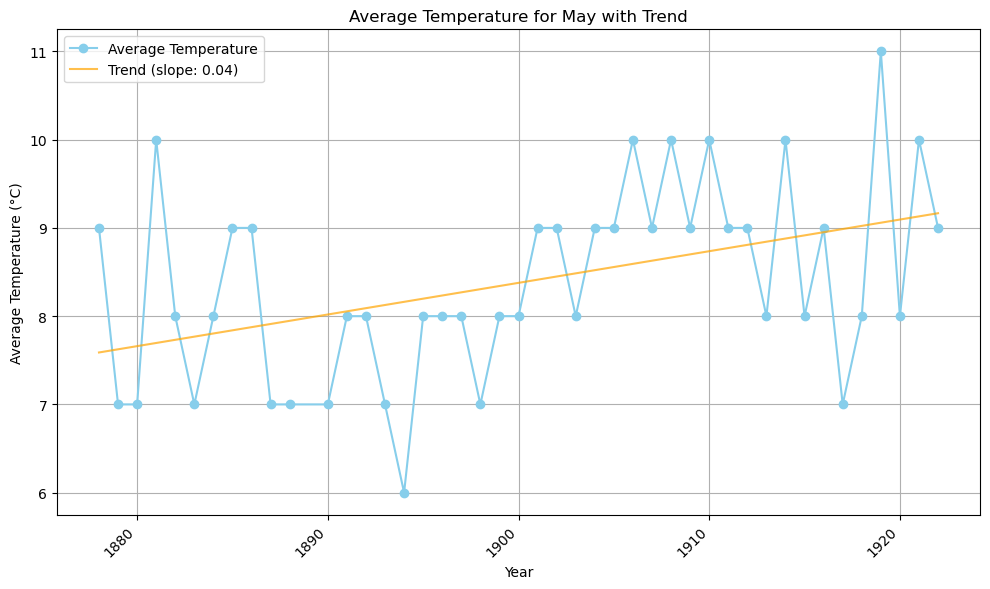

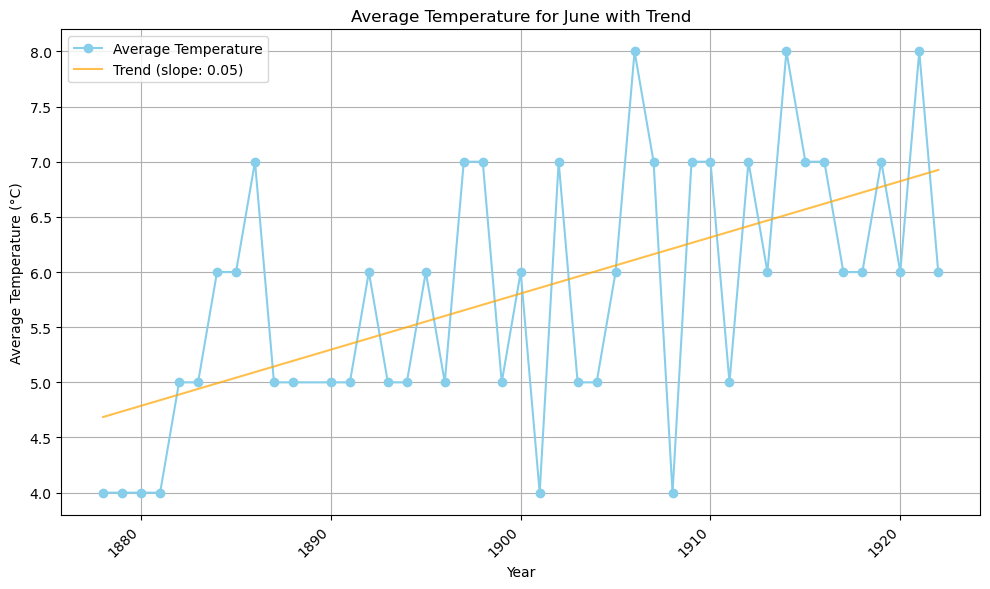

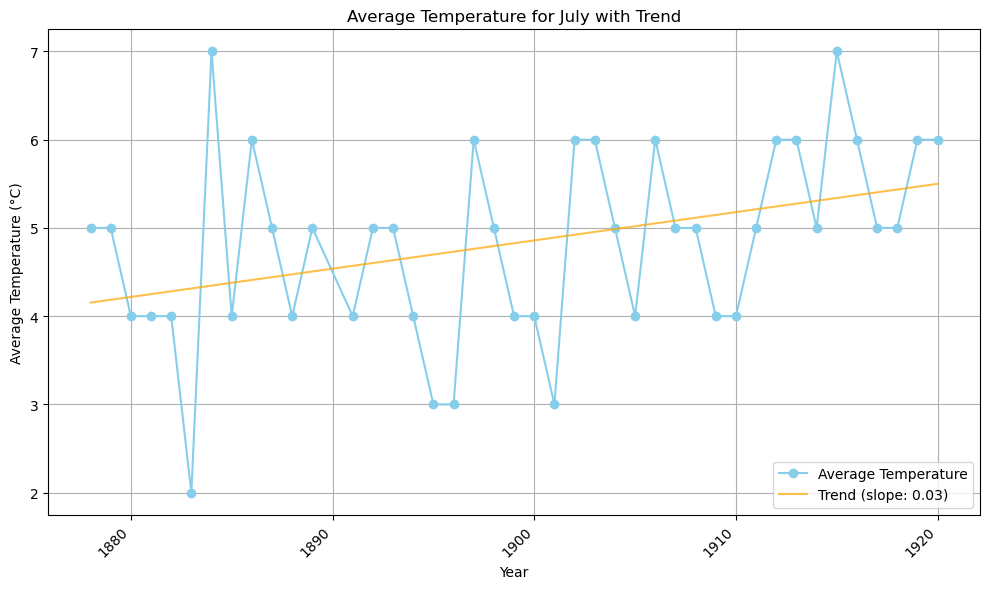

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the saved data
monthly_avg_temp = pd.read_csv('monthly_avg_temp.csv')

# Convert 'Year' and 'Month' columns to datetime
monthly_avg_temp['Year'] = pd.to_datetime(monthly_avg_temp['Year'], format='%Y')
monthly_avg_temp['Month'] = pd.to_datetime(monthly_avg_temp['Month'], format='%m').dt.month_name()

# Iterate over each month and plot the average temperature for all years as a line graph with trend line
for month in monthly_avg_temp['Month'].unique():
    data = monthly_avg_temp[monthly_avg_temp['Month'] == month]
    
    # Calculate trend line
    slope, intercept, r_value, p_value, std_err = stats.linregress(data['Year'].dt.year, data['Average Temp (C)'])
    trend_line = intercept + slope * data['Year'].dt.year
    
    plt.figure(figsize=(10, 6))
    plt.plot(data['Year'].dt.year, data['Average Temp (C)'], marker='o', color='skyblue', label='Average Temperature')
    plt.plot(data['Year'].dt.year, trend_line, color='orange', label=f'Trend (slope: {slope:.2f})', alpha=0.7)  # Display slope value
    plt.title(f'Average Temperature for {month} with Trend')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature (°C)')
    plt.grid(True)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis ticks for better readability
    plt.legend()
    plt.tight_layout()
    plt.show()


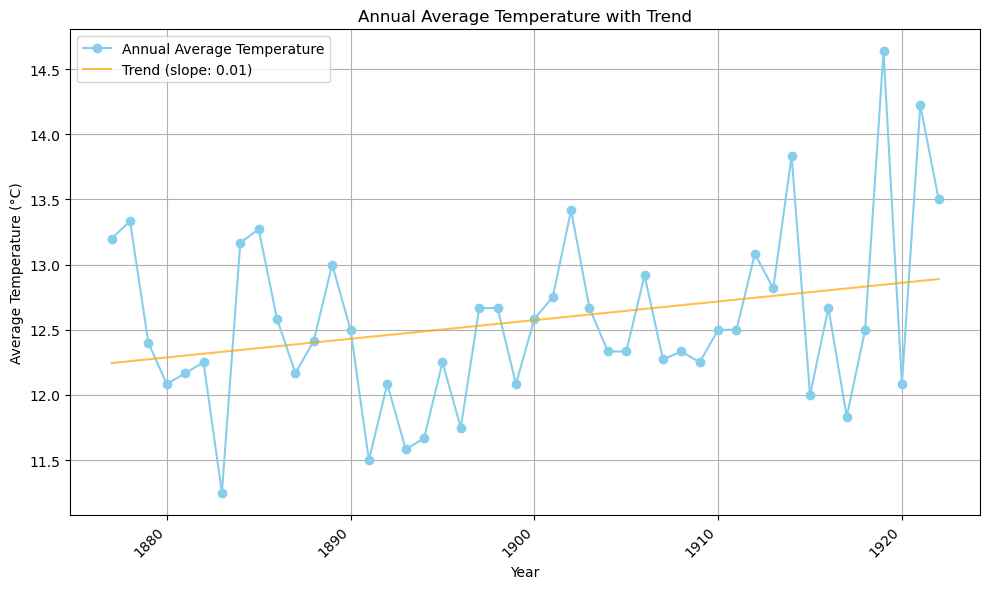

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the saved data
monthly_avg_temp = pd.read_csv('monthly_avg_temp.csv')

# Convert 'Year' and 'Month' columns to datetime
monthly_avg_temp['Year'] = pd.to_datetime(monthly_avg_temp['Year'], format='%Y')
monthly_avg_temp['Month'] = pd.to_datetime(monthly_avg_temp['Month'], format='%m').dt.month_name()

# Aggregate monthly data to calculate annual average temperature
annual_avg_temp = monthly_avg_temp.groupby('Year')['Average Temp (C)'].mean().reset_index()

# Calculate trend line for annual average temperature
slope, intercept, r_value, p_value, std_err = stats.linregress(annual_avg_temp['Year'].dt.year, annual_avg_temp['Average Temp (C)'])
trend_line = intercept + slope * annual_avg_temp['Year'].dt.year

# Plot the graph for annual average temperature with trend line
plt.figure(figsize=(10, 6))
plt.plot(annual_avg_temp['Year'].dt.year, annual_avg_temp['Average Temp (C)'], marker='o', color='skyblue', label='Annual Average Temperature')
plt.plot(annual_avg_temp['Year'].dt.year, trend_line, color='orange', label=f'Trend (slope: {slope:.2f})', alpha=0.7)  # Display slope value
plt.title('Annual Average Temperature with Trend')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.grid(True)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis ticks for better readability
plt.legend()
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the filtered seasonal average temperature data
monthly_avg_temp = pd.read_csv('monthly_avg_temp.csv')

# Check if data is loaded correctly
print("Loaded data:")
print(monthly_avg_temp.head())

# Reverse the seasons for the Southern Hemisphere
monthly_avg_temp['Season'] = monthly_avg_temp['Month'].map({
    3: 'Autumn',
    4: 'Autumn',
    5: 'Autumn',
    6: 'Winter',
    7: 'Winter',
    8: 'Winter',
    9: 'Spring',
    10: 'Spring',
    11: 'Spring',
    12: 'Summer',
    1: 'Summer',
    2: 'Summer'
})

# Check if season mapping is done correctly
print("\nSeason mapping:")
print(monthly_avg_temp.head())

# Group by year and season, calculate the average temperature for each season
seasonal_avg_temp = monthly_avg_temp.groupby(['Year', 'Season']).agg({'Average Temp (C)': 'mean'}).reset_index()

# Check the aggregated seasonal data
print("\nAggregated seasonal data:")
print(seasonal_avg_temp.head())

# Filter out years where all three months for each season are present
filter_monthly_avg_temp = seasonal_avg_temp.groupby(['Year', 'Season']).filter(lambda x: len(x) == 3)

# Check the filtered data
print("\nFiltered seasonal data:")
print(filter_monthly_avg_temp.head())

# Calculate trend for each season
trends = {}
for season in filter_monthly_avg_temp['Season'].unique():
    data = filter_monthly_avg_temp[filter_monthly_avg_temp['Season'] == season]
    print(f"\nData for {season}:")
    print(data)
    slope, _, _, _, _ = stats.linregress(data['Year'], data['Average Temp (C)'])
    trends[season] = slope

# Display the trends
print("\nTrends for each season:")
for season, trend in trends.items():
    print(f"{season}: {trend:.2f} °C/year")


Loaded data:
   Year  Month  Average Max Temp (C)  Average Min Temp (C)  Average Temp (C)
0  1877      8                    15                     0                 7
1  1877      9                    16                     2                 9
2  1877     10                    20                     5                12
3  1877     11                    27                    10                18
4  1877     12                    28                    12                20

Season mapping:
   Year  Month  Average Max Temp (C)  Average Min Temp (C)  Average Temp (C)  \
0  1877      8                    15                     0                 7   
1  1877      9                    16                     2                 9   
2  1877     10                    20                     5                12   
3  1877     11                    27                    10                18   
4  1877     12                    28                    12                20   

   Season  
0  Winter  
1  

In [22]:
print(filter_monthly_avg_temp.to_string(index=False))

Empty DataFrame
Columns: [Year, Season, Average Temp (C)]
Index: []


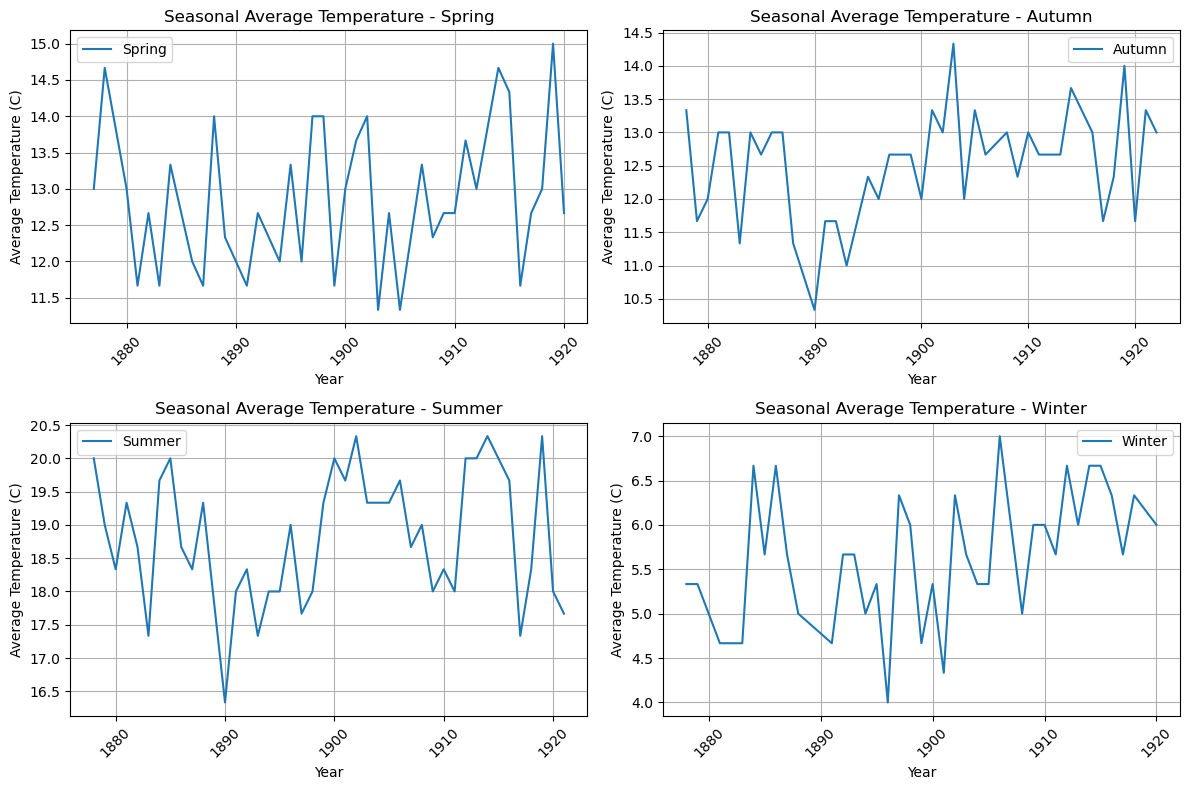

Trends for each season:
Spring: 0.01 °C/year
Autumn: 0.02 °C/year
Summer: 0.01 °C/year
Winter: 0.03 °C/year


In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Load the filtered seasonal average temperature data
monthly_avg_temp = pd.read_csv('monthly_avg_temp.csv')

# Reverse the seasons for the Southern Hemisphere
monthly_avg_temp['Season'] = monthly_avg_temp['Month'].map({
    3: 'Autumn',
    4: 'Autumn',
    5: 'Autumn',
    6: 'Winter',
    7: 'Winter',
    8: 'Winter',
    9: 'Spring',
    10: 'Spring',
    11: 'Spring',
    12: 'Summer',
    1: 'Summer',
    2: 'Summer'
})

# Group by year and season, calculate the count of months for each season
seasonal_month_counts = monthly_avg_temp.groupby(['Year', 'Season']).size().reset_index(name='MonthCount')

# Filter out seasons where all three months are present
filter_monthly_avg_temp = seasonal_month_counts[seasonal_month_counts['MonthCount'] == 3]

# Merge with the original data to get average temperature
filter_monthly_avg_temp = filter_monthly_avg_temp.merge(monthly_avg_temp, on=['Year', 'Season'])

# Calculate trend for each season
trends = {}
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for ax, season in zip(axes.flatten(), filter_monthly_avg_temp['Season'].unique()):
    data = filter_monthly_avg_temp[filter_monthly_avg_temp['Season'] == season]
    aggregated_data = data.groupby(['Year', 'Season']).agg({'Average Temp (C)': 'mean'}).reset_index()
    ax.plot(aggregated_data['Year'], aggregated_data['Average Temp (C)'], label=season)
    ax.set_title(f'Seasonal Average Temperature - {season}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Average Temperature (C)')
    ax.legend()
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Display the trends
print("Trends for each season:")
for season in filter_monthly_avg_temp['Season'].unique():
    data = filter_monthly_avg_temp[filter_monthly_avg_temp['Season'] == season]
    slope, _, _, _, _ = stats.linregress(data['Year'], data['Average Temp (C)'])
    trends[season] = slope
    print(f"{season}: {slope:.2f} °C/year")


In [28]:
import numpy as np
import pandas as pd

# Function to identify consecutive missing values
def consecutive_missing_values(series, threshold):
    # Convert -99.9 values to NaN
    series = series.replace(-99.9, np.nan)
    # Find consecutive missing values
    consec_missing = series.isnull().groupby(series.notnull().cumsum()).sum()
    # Check if any consecutive missing values meet the threshold
    return any(consec_missing >= threshold)

# Assuming 'df' is your original DataFrame containing temperature data
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Extract Year-Month combination
df['YearMonth'] = df['Date'].dt.to_period('M')

# Create a DataFrame containing all unique combinations of years and months
all_months = pd.DataFrame([(year, month) for year in df['Year'].unique() for month in range(1, 13)], columns=['Year', 'Month'])

# Merge all_months with monthly_missing_values to include months with no missing values
merged_months = pd.merge(all_months, monthly_missing_values, on=['Year', 'Month'], how='left')

# Fill missing values with 0 for months with no missing values
merged_months['MissingDays'] = merged_months['MissingDays'].fillna(0)

# Filter out months with missing values ranging from 0 to 5 days (inclusive)
filtered_months = merged_months[(merged_months['MissingDays'] >= 0) & (merged_months['MissingDays'] <= 5)]

# Filter out months with missing values equal to or more than 3 days consecutively
filtered_months = filtered_months[~filtered_months.apply(lambda x: consecutive_missing_values(df[(df['Year'] == x['Year']) & (df['Month'] == x['Month'])]['Maximum.Temp..C.'], 3), axis=1)]


# Merge with the original DataFrame to get the maximum temperature values for the remaining months
merged_df = pd.merge(df, filtered_months, on=['Year', 'Month'], how='inner')

# Filter out rows with missing maximum temperature data (-99.9) for the remaining months
filtered_df = merged_df[merged_df['Maximum.Temp..C.'] != -99.9]

# Calculate the average maximum temperature values for all months
monthly_avg_max_temp = filtered_df.groupby(['Year', 'Month']).agg({'Maximum.Temp..C.': 'mean'}).reset_index()

# Convert maximum temperature values to integer format
monthly_avg_max_temp['Year'] = monthly_avg_max_temp['Year'].astype(int)
monthly_avg_max_temp['Month'] = monthly_avg_max_temp['Month'].astype(int)

# Identify filtered-out months
all_months['Key'] = all_months['Year'].astype(str) + '-' + all_months['Month'].astype(str)
filtered_months['Key'] = filtered_months['Year'].astype(str) + '-' + filtered_months['Month'].astype(str)
filtered_out_months = all_months[~all_months['Key'].isin(filtered_months['Key'])].drop(columns=['Key'])

# Display results
print("Filtered out months:")
print(filtered_out_months.to_string(index=False))

# Display the average maximum temperature values for each month
print("Average maximum temperature values for each month with less than or equal to 5 missing days and no 3 or more consecutive missing days:")
print(monthly_avg_max_temp.to_string(index=False))

# Save the DataFrame to a CSV file
monthly_avg_max_temp.to_csv('monthly_avg_max_temp.csv', index=False, header=['Year', 'Month', 'Avg Max Temp (°C)'])


Filtered out months:
 Year  Month
 1877      1
 1877      2
 1877      3
 1877      4
 1877      5
 1877      6
 1877      7
 1879      9
 1879     10
 1885      9
 1889      2
 1889      4
 1889      5
 1889      6
 1919      8
 1921      7
 1921      8
 1921     10
Average maximum temperature values for each month with less than or equal to 5 missing days and no 3 or more consecutive missing days:
 Year  Month  Maximum.Temp..C.
 1877      8         15.196774
 1877      9         16.036667
 1877     10         20.783871
 1877     11         27.576667
 1877     12         28.596774
 1878      1         30.258065
 1878      2         25.925926
 1878      3         24.910000
 1878      4         20.823333
 1878      5         15.712903
 1878      6          9.283333
 1878      7         11.670968
 1878      8         13.912903
 1878      9         17.563333
 1878     10         22.303226
 1878     11         27.703333
 1878     12         28.564516
 1879      1         28.830000
 1879   

In [29]:
import numpy as np
import pandas as pd

# Function to identify consecutive missing values
def consecutive_missing_values(series, threshold):
    # Convert -99.9 values to NaN
    series = series.replace(-99.9, np.nan)
    # Find consecutive missing values
    consec_missing = series.isnull().groupby(series.notnull().cumsum()).sum()
    # Check if any consecutive missing values meet the threshold
    return any(consec_missing >= threshold)

# Assuming 'df' is your original DataFrame containing temperature data
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Extract Year-Month combination
df['YearMonth'] = df['Date'].dt.to_period('M')

# Create a DataFrame containing all unique combinations of years and months
all_months = pd.DataFrame([(year, month) for year in df['Year'].unique() for month in range(1, 13)], columns=['Year', 'Month'])

# Merge all_months with monthly_missing_values to include months with no missing values
merged_months = pd.merge(all_months, monthly_missing_values, on=['Year', 'Month'], how='left')

# Fill missing values with 0 for months with no missing values
merged_months['MissingDays'] = merged_months['MissingDays'].fillna(0)

# Filter out months with missing values ranging from 0 to 5 days (inclusive)
filtered_months = merged_months[(merged_months['MissingDays'] >= 0) & (merged_months['MissingDays'] <= 5)]

# Filter out months with missing values equal to or more than 3 days consecutively
filtered_months = filtered_months[~filtered_months.apply(lambda x: consecutive_missing_values(df[(df['Year'] == x['Year']) & (df['Month'] == x['Month'])]['Minimum.Temp..C.'], 3), axis=1)]

# Merge with the original DataFrame to get the minimum temperature values for the remaining months
merged_df = pd.merge(df, filtered_months, on=['Year', 'Month'], how='inner')

# Filter out rows with missing minimum temperature data (-99.9) for the remaining months
filtered_df = merged_df[merged_df['Minimum.Temp..C.'] != -99.9]

# Calculate the average minimum temperature values for all months
monthly_avg_min_temp = filtered_df.groupby(['Year', 'Month']).agg({'Minimum.Temp..C.': 'mean'}).reset_index()

# Convert minimum temperature values to integer format
monthly_avg_min_temp['Year'] = monthly_avg_min_temp['Year'].astype(int)
monthly_avg_min_temp['Month'] = monthly_avg_min_temp['Month'].astype(int)

# Convert minimum temperature values to float with two decimal places
monthly_avg_min_temp['Minimum.Temp..C.'] = monthly_avg_min_temp['Minimum.Temp..C.'].round(2)

#Identify filtered-out months
all_months['Key'] = all_months['Year'].astype(str) + '-' + all_months['Month'].astype(str)
filtered_months['Key'] = filtered_months['Year'].astype(str) + '-' + filtered_months['Month'].astype(str)
filtered_out_months = all_months[~all_months['Key'].isin(filtered_months['Key'])].drop(columns=['Key'])

# Display results
print("Filtered out months:")
print(filtered_out_months.to_string(index=False))


# Display the average minimum temperature values for each month
print("Average minimum temperature values for each month with less than or equal to 5 missing days and no 3 or more consecutive missing days:")
print(monthly_avg_min_temp.to_string(index=False))

# Save the DataFrame to a CSV file
monthly_avg_min_temp.to_csv('monthly_avg_min_temp.csv', index=False, header=['Year', 'Month', 'Avg Min Temp (°C)'])


Filtered out months:
 Year  Month
 1877      1
 1877      2
 1877      3
 1877      4
 1877      5
 1877      6
 1877      7
 1879      9
 1879     10
 1889      2
 1890      7
 1890      8
 1890      9
 1890     10
 1907      3
 1913     10
 1915      2
 1915      3
 1915      4
 1919      8
 1921      7
 1921      8
 1921     10
Average minimum temperature values for each month with less than or equal to 5 missing days and no 3 or more consecutive missing days:
 Year  Month  Minimum.Temp..C.
 1877      8              0.04
 1877      9              2.87
 1877     10              5.11
 1877     11             10.88
 1877     12             12.31
 1878      1             13.22
 1878      2             14.01
 1878      3             13.39
 1878      4              7.38
 1878      5              3.79
 1878      6             -1.68
 1878      7              0.07
 1878      8              1.60
 1878      9              6.33
 1878     10              8.46
 1878     11             10.57
 1878